# <font color='blue'>Breast Cancer Prediction</font>

 - [About data Set](#about-data-set) 
 - [Objective](#problem-statement)
 - [Import libraries, dataset](#load-libraries-and-read-the-data)
 - [Exploratory Data Analysis (EDA)](#eda)
 - [Preparing The Data](#preparing-the-data)
 - [Models Building](#models-building)
 - [Models Enhancement](#models-enhancement)
 - [Prediction System](#prediction-system)
 - [Conclusion](#conclusion)
 - [References](#references)

<a id="about-data-set"></a>

### <font color='blue'>About data set :</font>
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

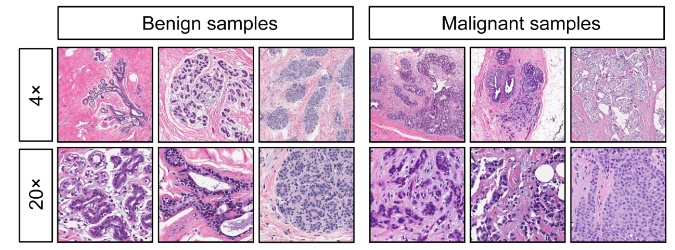

- Interestingly, several suspicious differences were found, thereby encouraging researchers to further understand what dominant features may affect the decision rule :

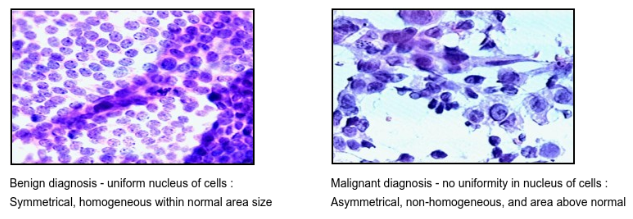

#### This data set is taken from Data World UCI Breast Cancer Wisconsin (Diagnostic): 
https://data.world/uci/breast-cancer-wisconsin-diagnostic

<a id="problem-statement"></a>
### <font color='blue'>Problem Statement :</font>
Predicting whether a breast mass is benign or malignant based on 30 features in the dataset. This prediction can be useful in diagnosing patients with suspected breast cancer.

 - ID number
 - Diagnosis (M = malignant, B = benign)
 
Ten real-valued features are computed for each cell nucleus:
 - radius (mean of distances from center to points on the perimeter)
 - texture (standard deviation of gray-scale values)
 - perimeter
 - area
 - smoothness (local variation in radius lengths)
 - compactness (perimeter^2 / area - 1.0)
 - concavity (severity of concave portions of the contour)
 - concave points (number of concave portions of the contour)
 - symmetry
 - fractal dimension ("coastline approximation" - 1)

<a id="load-libraries-and-read-the-data"></a>
## <font color='blue'>1. Load libraries and read the data</font>

### 1.1. Load libraries

In [1]:
# Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# Chi Square
from sklearn.feature_selection import chi2
import scipy.stats as stats

# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

# Constant feature checking
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

### 1.2. Read the data

In [2]:
# to import a file into a pandas DataFrame
df = pd.read_csv('cancer_data.csv')

# to display the dataframe
df.head(20)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302         M        17.99         10.38          122.80     1001.0   
1     842517         M        20.57         17.77          132.90     1326.0   
2   84300903         M        19.69         21.25          130.00     1203.0   
3   84348301         M        11.42         20.38           77.58      386.1   
4   84358402         M        20.29         14.34          135.10     1297.0   
5     843786         M        12.45         15.70           82.57      477.1   
6     844359         M        18.25         19.98          119.60     1040.0   
7   84458202         M        13.71         20.83           90.20      577.9   
8     844981         M        13.00         21.82           87.50      519.8   
9   84501001         M        12.46         24.04           83.97      475.9   
10    845636         M        16.02         23.24          102.70      797.8   
11  84610002         M        15.78         17.89          103.60      781.0   
12    846226         M        19.17         24.80          132.40     1123.0   
13    846381         M        15.85         23.95          103.70      782.7   
14  84667401         M        13.73         22.61           93.60      578.3   
15  84799002         M        14.54         27.54           96.73      658.8   
16    848406         M        14.68         20.13           94.74      684.5   
17  84862001         M        16.13         20.68          108.10      798.8   
18    849014         M        19.81         22.15          130.00     1260.0   
19   8510426         B        13.54         14.36           87.46      566.3   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.11840           0.27760         0.30010              0.14710   
1           0.08474           0.07864         0.08690              0.07017   
2           0.10960           0.15990         0.19740              0.12790   
3           0.14250           0.28390         0.24140              0.10520   
4           0.10030           0.13280         0.19800              0.10430   
5           0.12780           0.17000         0.15780              0.08089   
6           0.09463           0.10900         0.11270              0.07400   
7           0.11890           0.16450         0.09366              0.05985   
8           0.12730           0.19320         0.18590              0.09353   
9           0.11860           0.23960         0.22730              0.08543   
10          0.08206           0.06669         0.03299              0.03323   
11          0.09710           0.12920         0.09954              0.06606   
12          0.09740           0.24580         0.20650              0.11180   
13          0.08401           0.10020         0.09938              0.05364   
14          0.11310           0.22930         0.21280              0.08025   
15          0.11390           0.15950         0.16390              0.07364   
16          0.09867           0.07200         0.07395              0.05259   
17          0.11700           0.20220         0.17220              0.10280   
18          0.09831           0.10270         0.14790              0.09498   
19          0.09779           0.08129         0.06664              0.04781   

    ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0   ...          17.33           184.60      2019.0            0.1622   
1   ...          23.41           158.80      1956.0            0.1238   
2   ...          25.53           152.50      1709.0            0.1444   
3   ...          26.50            98.87       567.7            0.2098   
4   ...          16.67           152.20      1575.0            0.1374   
5   ...          23.75           103.40       741.6            0.1791   
6   ...          27.66           153.20      1606.0            0.1442   
7   ...          28.14           110.60       897.0            0.1654   
8   ...          30.73           

### Insights of data set

 - **Checking the shape of the data set in the form of rows and columns**

In [3]:
df.shape

(569, 33)

 - There are **569 rows** and **33 columns**

 - **Viweing the columns available in our data set**

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

 - **Standardizing the column names for it's practicality**

In [5]:
# standardized column names will be meaninfull strings, lower cased and with '_' instead of 'spaces'
df.columns = [df.columns[i].lower().replace(' ','_') for i in range(len(df.columns))]

# Checking column names after standardization
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'unnamed:_32'],
      dtype='object')

 - **Checking for the number of Categorical and Numerical columns**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

 - There are total **569** entries.
 - There are **31 columns** with **floating** values.
 - There is **1** column with **integer** values.
 - There is **1** column with **categorical** values.

 - **Dropping columns which are less usefull for analysis**

In [7]:
# Creating a copy of original dataframe and dropping the unnecessary columns
df2 = df.drop(columns=['unnamed:_32', 'id'], axis=1)

# Reading the new data frame after dropping the columns
df2.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

 - **Chcking the shape of new data set after dropping the columns**

In [8]:
df2.shape

(569, 31)

 - There are **569 rows** and **31 columns** as we have dropped 2 columns.

 - **Checking the count of duplicate values**

In [9]:
df2.duplicated().sum().sum()

0

 - **Checking the count of null values**

In [10]:
df2.isnull().sum().sum()

0

 - There are no missing values in this dataset

 - **Counting class labels of Target variable**

In [11]:
df2['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

 - **Replacing the diagnosis of malignant or benign with 1s and 0s respectively.**

In [12]:
df2['diagnosis'].replace({'M':1, 'B':0}, inplace = True) # it will change the data type of 'diagnosis' column to int

In [13]:
# Counting class labels of Target variable
df2['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [14]:
# Checking data frame after replacing target column values
df2.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [15]:
# Checking data-type of the 'diagnosis' column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<a id="eda"></a>
## <font color='blue'>2. Exploratory Data Analysis (EDA)</font>

### 2.1 Checking the summary of descriptive statistics for numerical data

In [16]:
# describe
df2.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave_points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

### 2.2  Checking Target distribution

In [17]:
diagnosis_counts = df2['diagnosis'].value_counts()
diagnosis_counts

0    357
1    212
Name: diagnosis, dtype: int64

([<matplotlib.axis.XTick at 0x2178cc79870>,
 [Text(0, 0, 'benign'), Text(1, 0, 'malignant')])

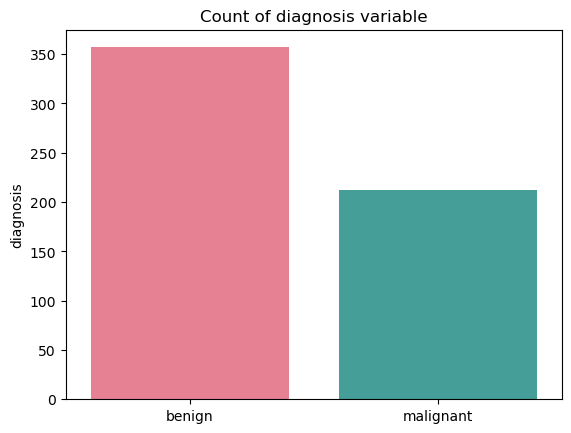

In [18]:
sns.barplot(x=df2['diagnosis'].value_counts().index, y=df2['diagnosis'].value_counts(),palette = 'husl',)
plt.title("Count of diagnosis variable")

# Rename x-axis labels
plt.xticks(range(len(diagnosis_counts.index)), ['benign','malignant'])

In [19]:
labels = ['benign','malignant']
total = sum(diagnosis_counts)  # diagnosis_counts = df2['diagnosis'].value_counts()
val1 = round(diagnosis_counts/total*100,2)
print(val1)
print(total)

0    62.74
1    37.26
Name: diagnosis, dtype: float64
569


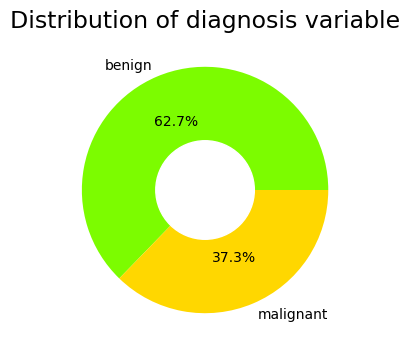

In [20]:
plt.figure(figsize=(4,4))
colors = ['lawngreen','gold'] # 'paleturquoise',
plot3 = plt.pie(x = val1,labels = labels,autopct='%1.1f%%',colors=colors)

circle = plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Distribution of diagnosis variable',fontsize = 17)
plt.show()

From the above distributions we can see that **Malignant** and **Benign** patients ratio is **37% (212/569)** and **63% (357/569)** respectively.

### 2.3 Checking Features distribution with respect to Target column

**Plot distribution 'mean'**

In [21]:
df2.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [22]:
# Seperating df with 'mean' features to see the distribution of values against the target column
df_mean = df2[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']] 

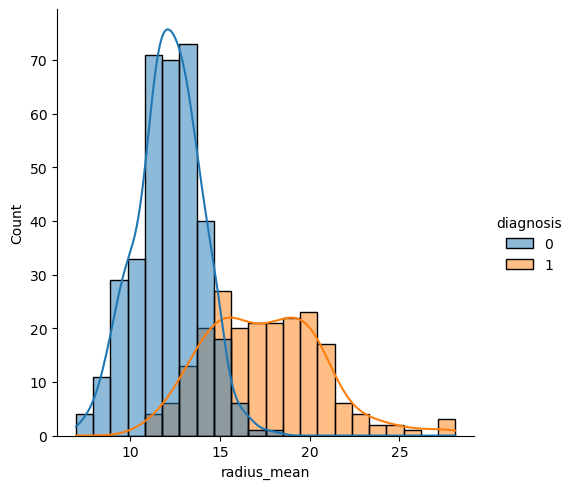

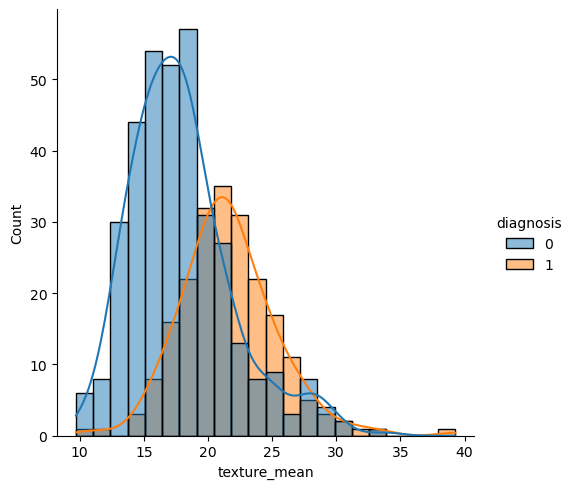

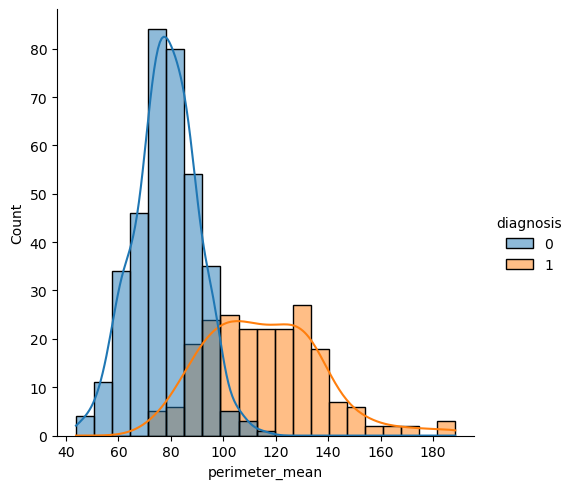

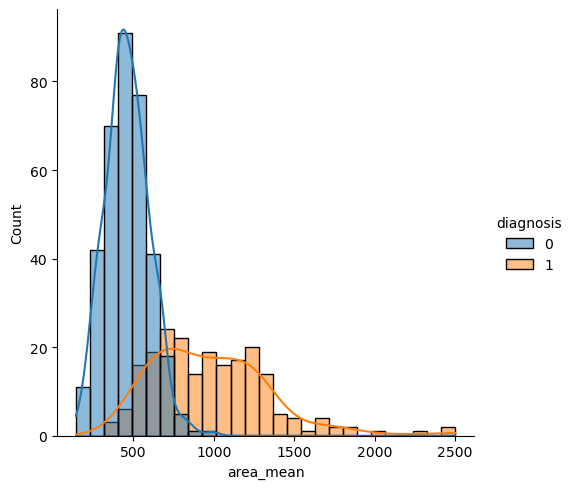

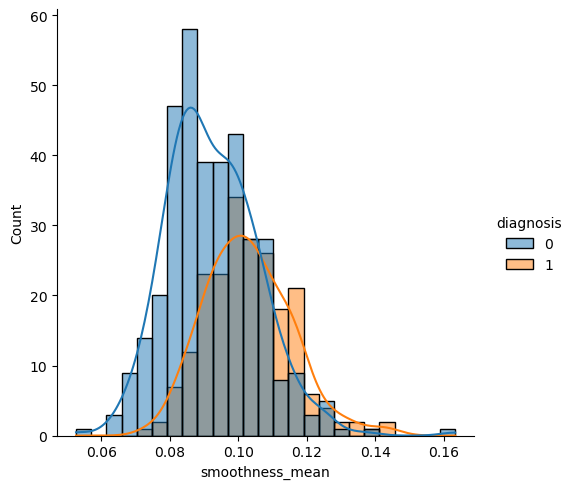

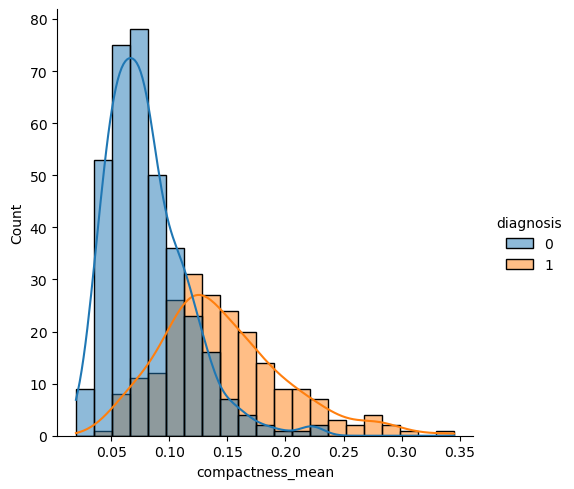

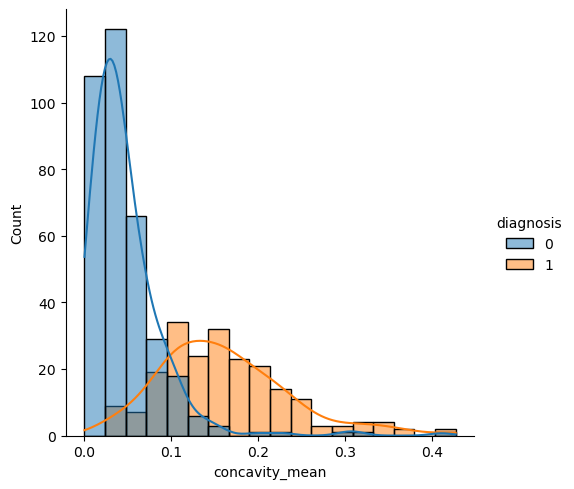

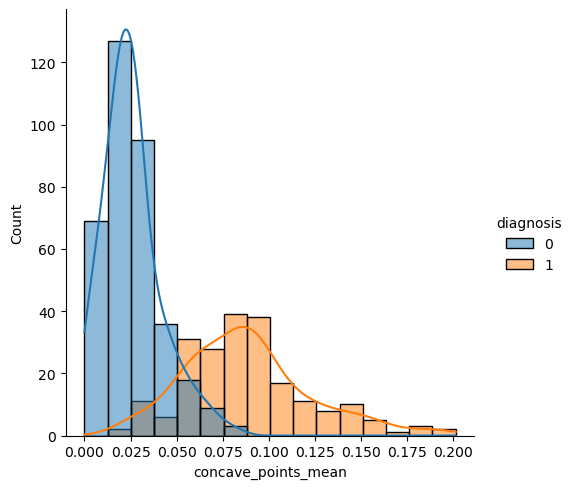

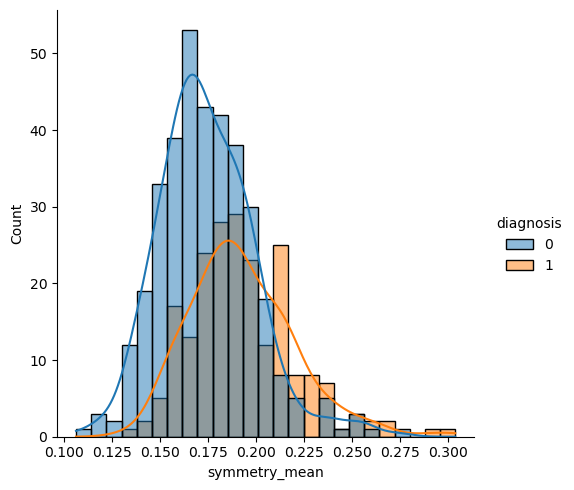

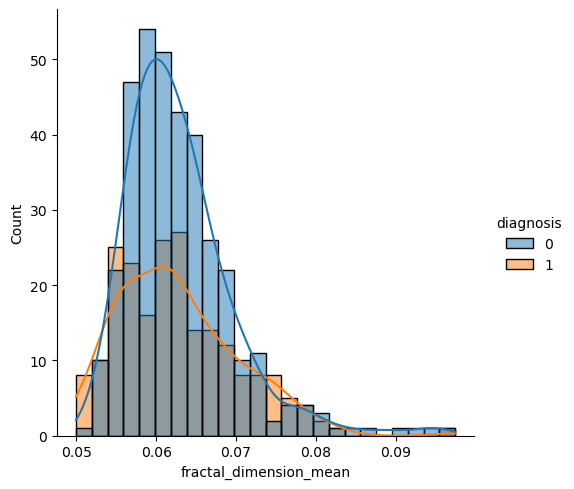

In [23]:
# Plotting distribution
for i in df_mean.columns:
    sns.displot(x = df_mean[i],hue=df2['diagnosis'],kde=True, palette=('tab10'))
    plt.show()

 - **'radius_mean','texture_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean' and 'concave_points_mean'** features, median of the Malignant and Benign looks like separated so it can be good for classification. 
 - However, in **'fractal_dimension_mean','smoothness_mean','symmetry_mean'** features, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

**Plot distribution 'se'**

In [24]:
# Seperating df with 'se' features to see the distribution of values against the target column
df_se = df2[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se']]

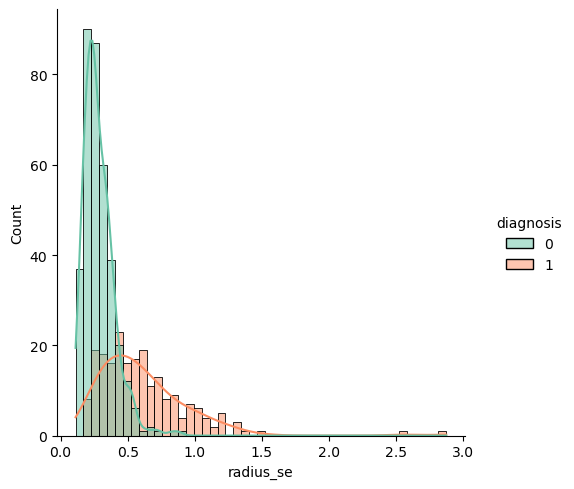

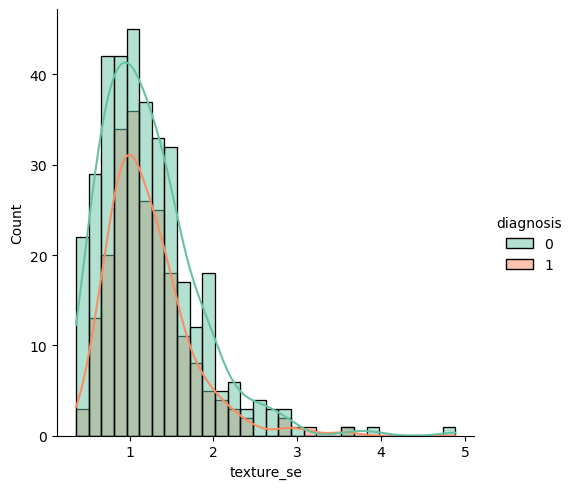

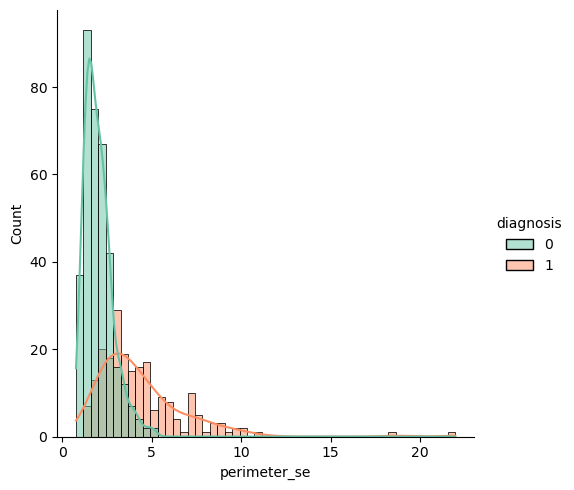

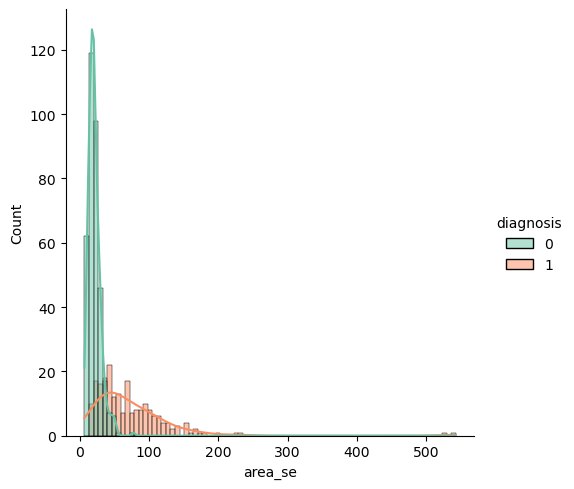

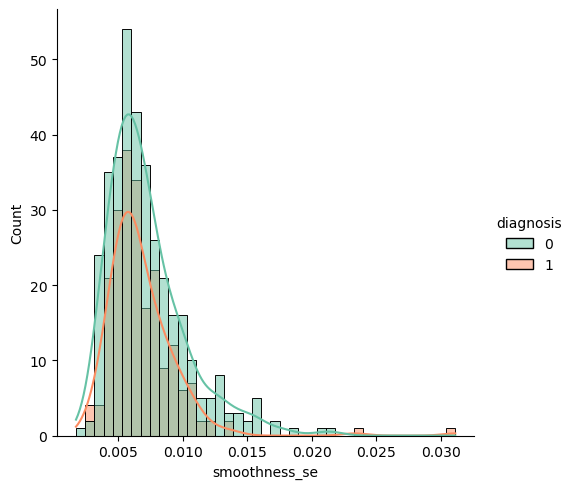

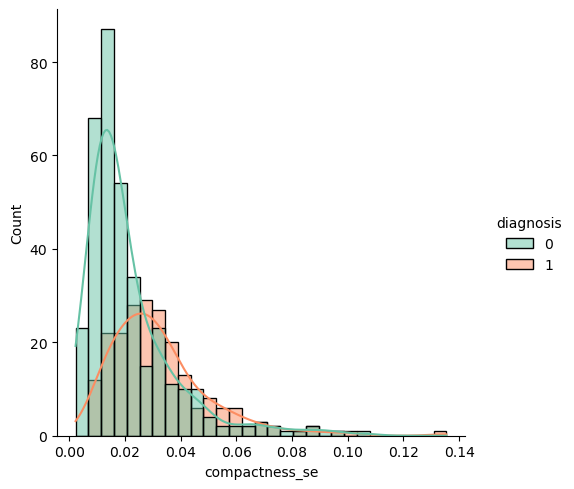

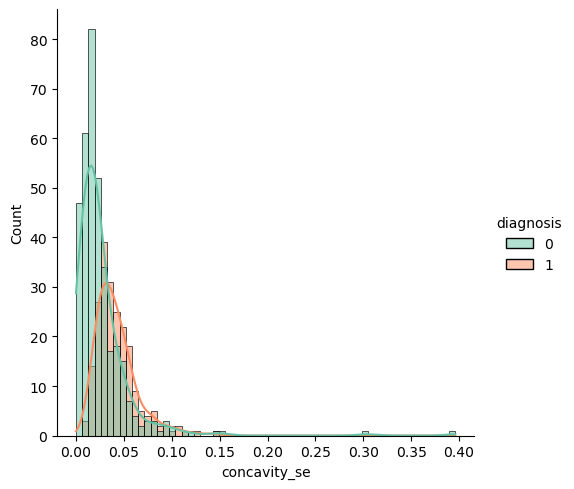

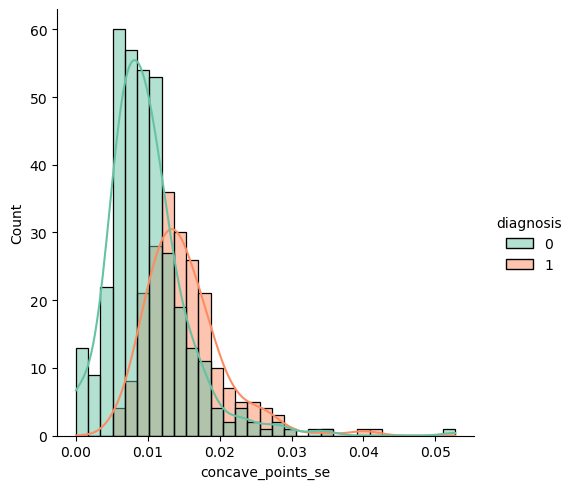

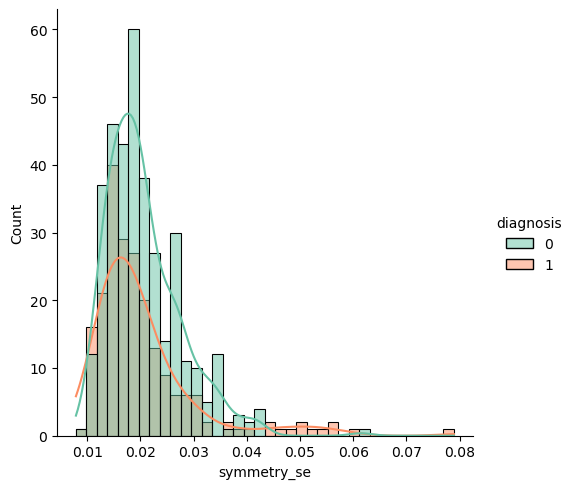

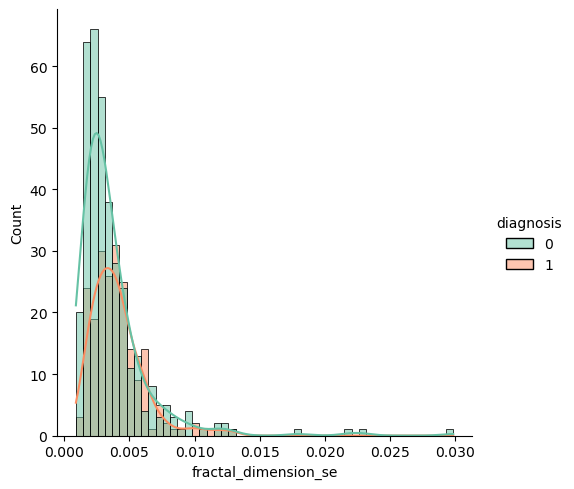

In [25]:
# Plotting distribution
for i in df_se.columns:
    sns.displot(x = df_se[i],hue=df2['diagnosis'],kde=True, palette=('Set2'))
    plt.show()

 -  **''radius_se','area_se'** in the above plots looks like **malignant and benign are separated** not totally but **mostly.**
 - However, in **'texture_se','compactness_se','symmetry_se','smoothness_se','fractal_dimension_se',concavity_se' and 'concave_point_se'** features, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

**plot distribution 'worst'**

In [26]:
# Seperating df with 'worst' features to see the distribution of values against the target column
df_worst = df2[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

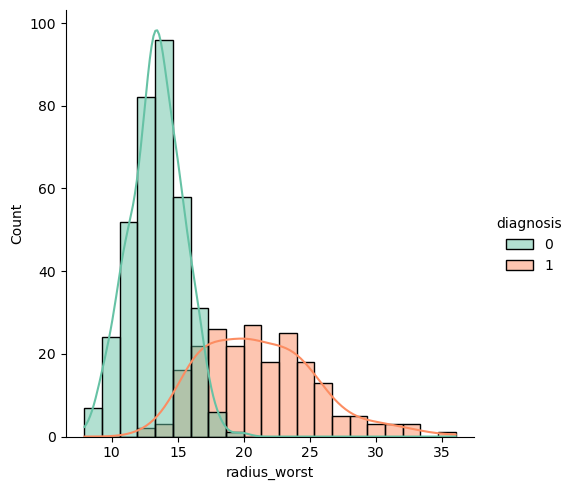

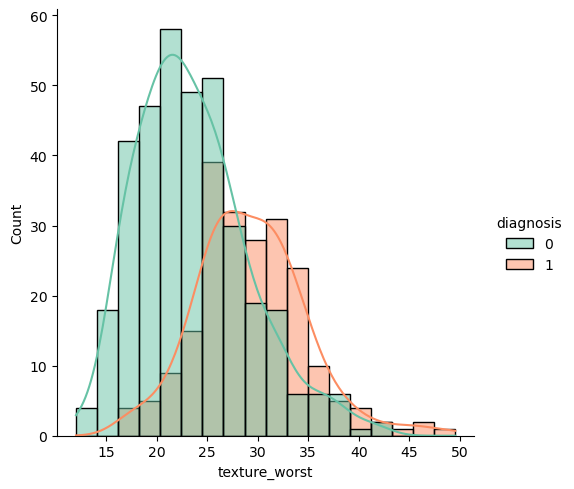

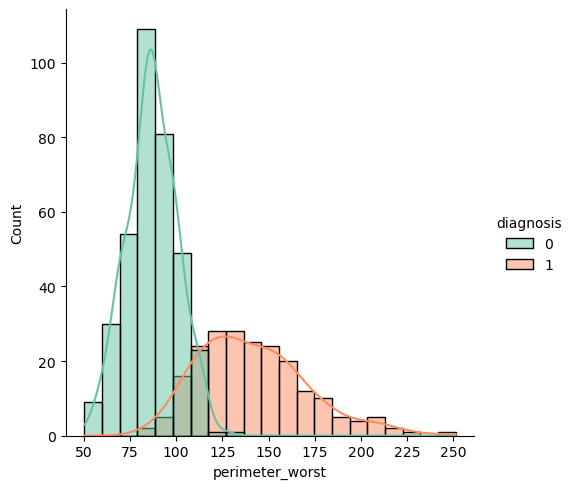

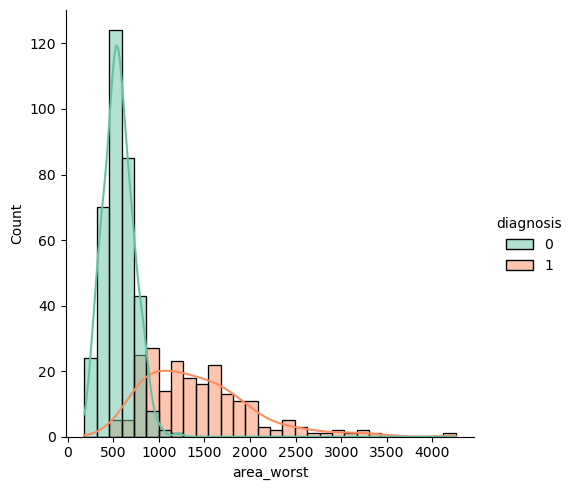

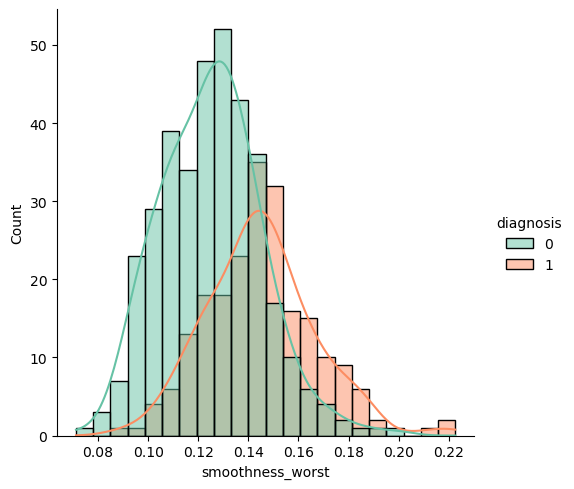

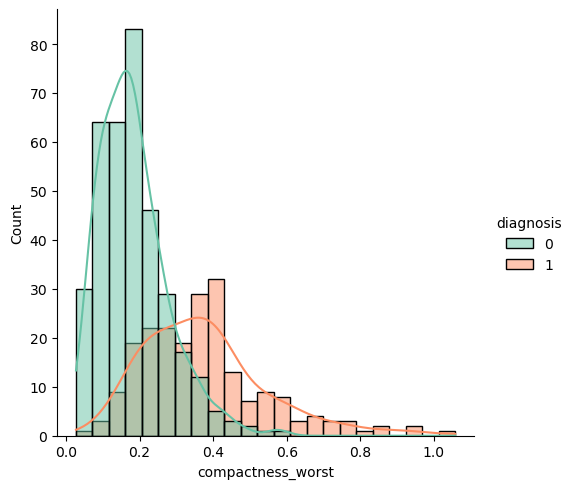

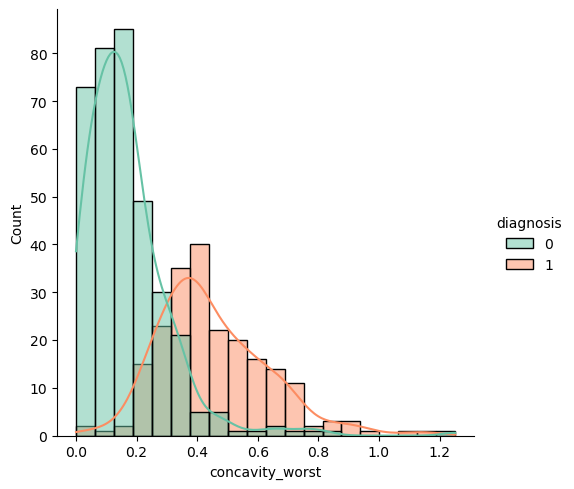

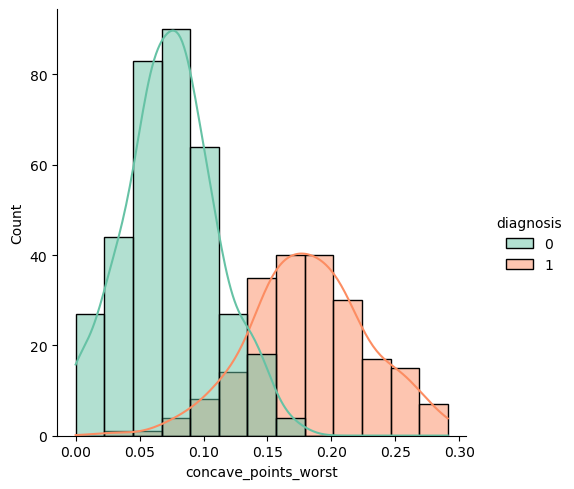

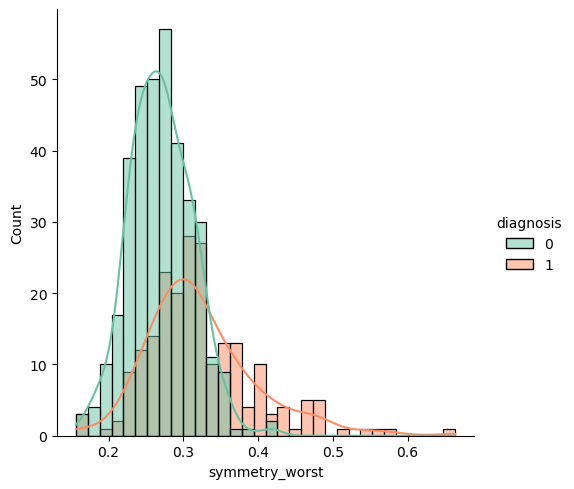

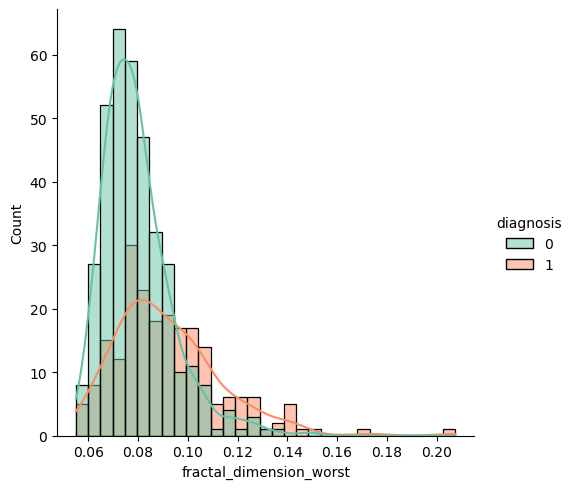

In [27]:
# Plotting distribution
for i in df_worst.columns:
    sns.displot(x = df_worst[i],hue=df2['diagnosis'],kde=True, palette=('Set2'))
    plt.show()

- **'radius_worst','perimeter_worst','area_worst','compactness_worst','concavity_worst' and'concave_points_worst'** features, median of the Malignant and Benign looks like separated so it can be good for classification.
 - However, in **'fractal_dimension_worst','symmetry_worst','smoothness_worst' and 'texture_worst'** features, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

 - **Plotting the correlation**

In [28]:
c = round(df2.corr(),2)
c

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                     1.00         0.73          0.42            0.74   
radius_mean                   0.73         1.00          0.32            1.00   
texture_mean                  0.42         0.32          1.00            0.33   
perimeter_mean                0.74         1.00          0.33            1.00   
area_mean                     0.71         0.99          0.32            0.99   
smoothness_mean               0.36         0.17         -0.02            0.21   
compactness_mean              0.60         0.51          0.24            0.56   
concavity_mean                0.70         0.68          0.30            0.72   
concave_points_mean           0.78         0.82          0.29            0.85   
symmetry_mean                 0.33         0.15          0.07            0.18   
fractal_dimension_mean       -0.01        -0.31         -0.08           -0.26   
radius_se                     0.57         0.68          0.28            0.69   
texture_se                   -0.01        -0.10          0.39           -0.09   
perimeter_se                  0.56         0.67          0.28            0.69   
area_se                       0.55         0.74          0.26            0.74   
smoothness_se                -0.07        -0.22          0.01           -0.20   
compactness_se                0.29         0.21          0.19            0.25   
concavity_se                  0.25         0.19          0.14            0.23   
concave_points_se             0.41         0.38          0.16            0.41   
symmetry_se                  -0.01        -0.10          0.01           -0.08   
fractal_dimension_se          0.08        -0.04          0.05           -0.01   
radius_worst                  0.78         0.97          0.35            0.97   
texture_worst                 0.46         0.30          0.91            0.30   
perimeter_worst               0.78         0.97          0.36            0.97   
area_worst                    0.73         0.94          0.34            0.94   
smoothness_worst              0.42         0.12          0.08            0.15   
compactness_worst             0.59         0.41          0.28            0.46   
concavity_worst               0.66         0.53          0.30            0.56   
concave_points_worst          0.79         0.74          0.30            0.77   
symmetry_worst                0.42         0.16          0.11            0.19   
fractal_dimension_worst       0.32         0.01          0.12            0.05   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                     0.71             0.36              0.60   
radius_mean                   0.99             0.17              0.51   
texture_mean                  0.32            -0.02              0.24   
perimeter_mean                0.99             0.21              0.56   
area_mean                     1.00             0.18              0.50   
smoothness_mean               0.18             1.00              0.66   
compactness_mean              0.50             0.66              1.00   
concavity_mean                0.69             0.52              0.88   
concave_points_mean           0.82             0.55              0.83   
symmetry_mean                 0.15             0.56              0.60   
fractal_dimension_mean       -0.28             0.58              0.57   
radius_se                     0.73             0.30              0.50   
texture_se                   -0.07             0.07              0.05   
perimeter_se                  0.73             0.30              0.55   
area_se                       0.80             0.25              0.46   
smoothness_se                -0.17             0.33              0.14   
compactness_se                0.21             0.32              0.74   
concavity_se                  0.21             0.25              0.57   
concave_points_se             0.37           

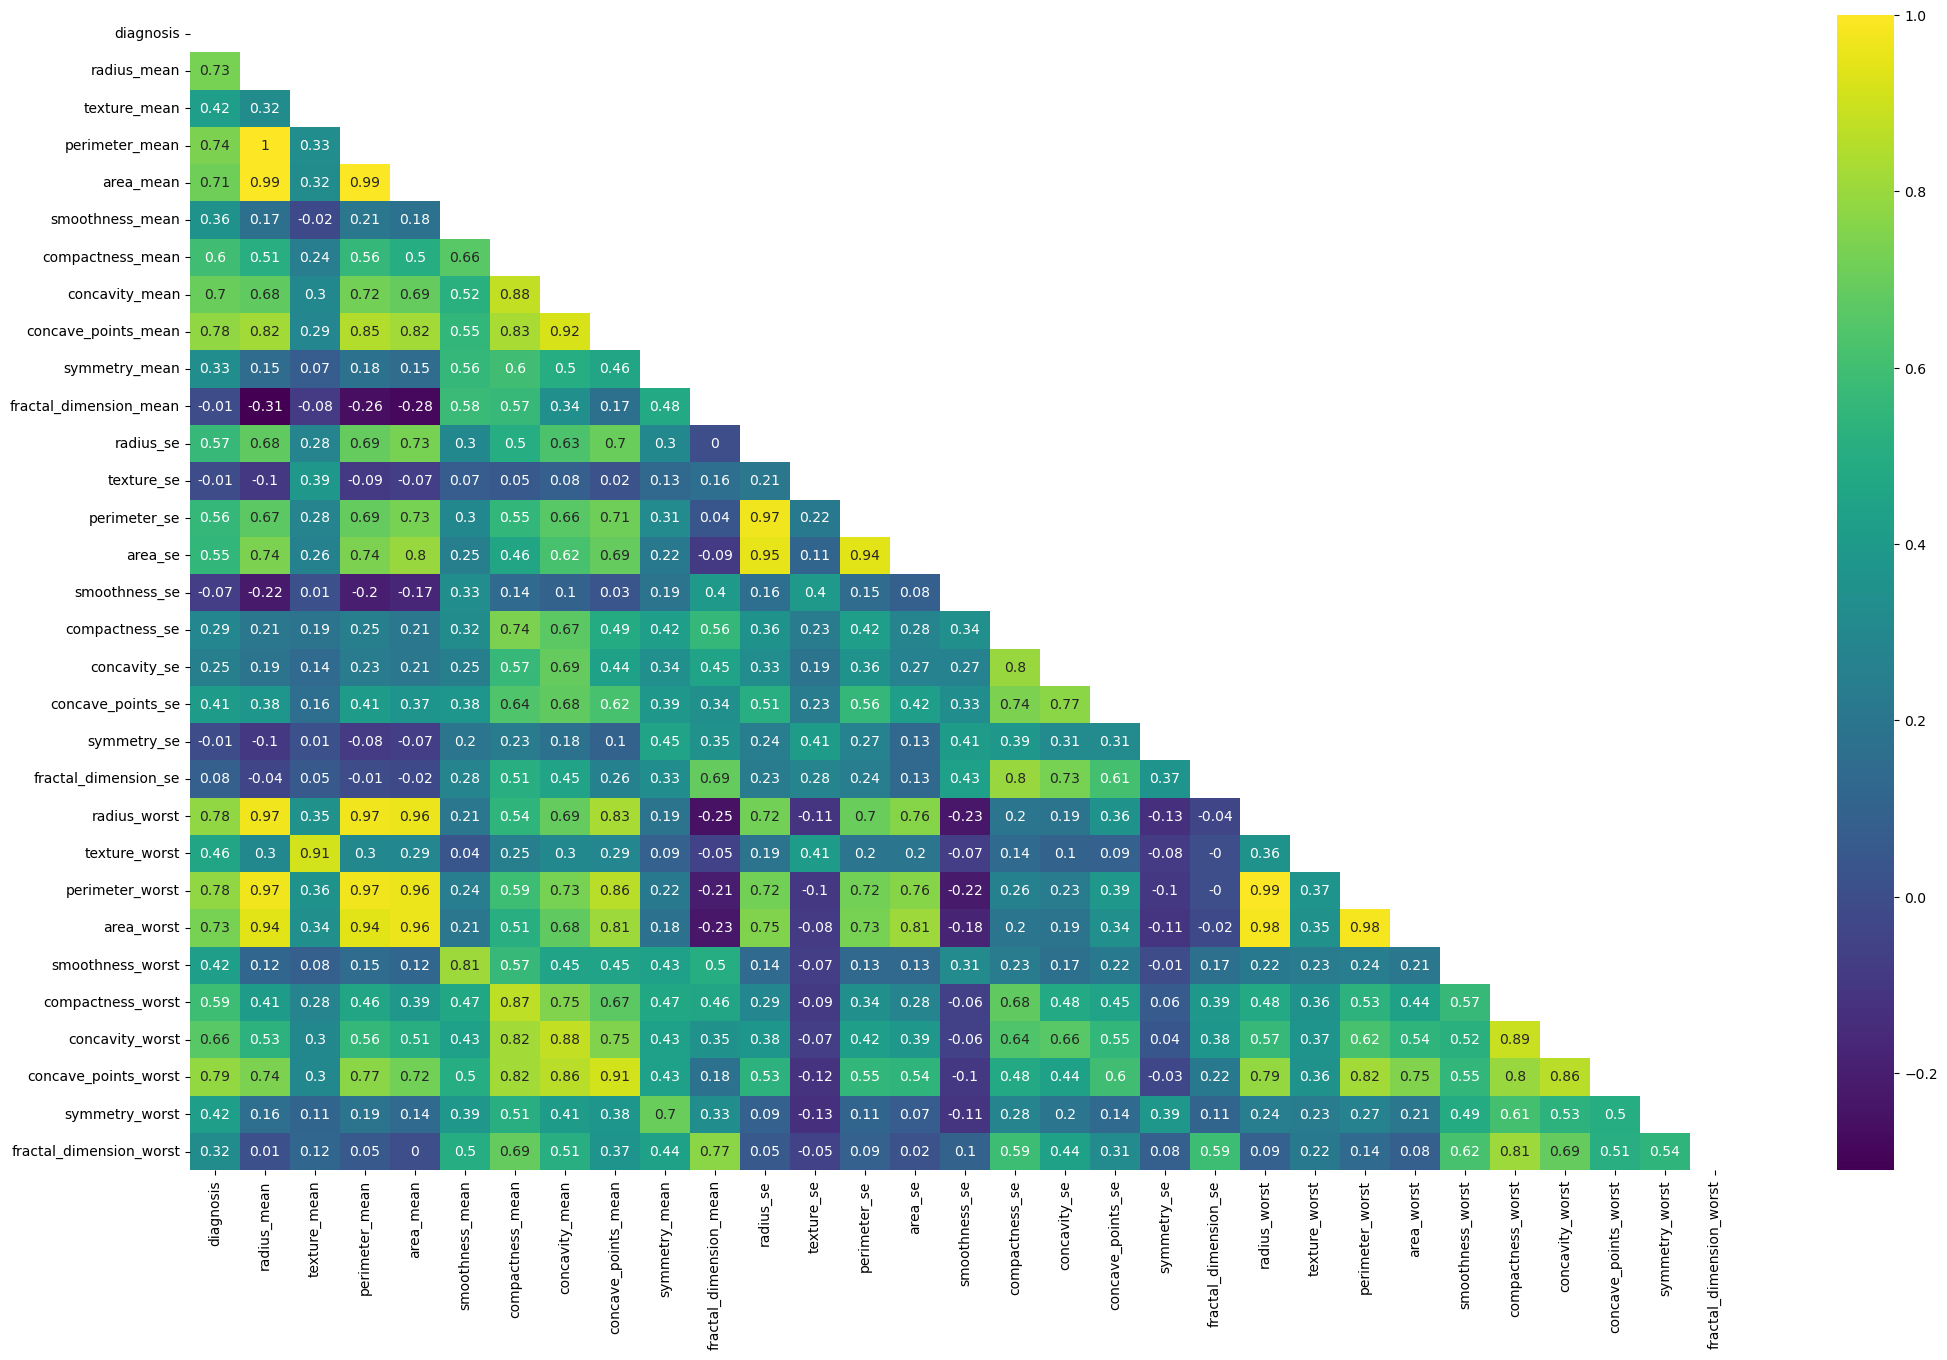

In [29]:
# visual view of correlation on nemerical columns
plt.figure(figsize=(25,15))
mask = np.zeros_like(c, dtype= bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(c, annot=True, mask=mask, cmap="viridis")
plt.show()

**Observation :** According to heatmap, removing the below columns from the data to avoid multicollinearity
 1. radius_mean 
 2. perimeter_mean 
 3. area_mean 
 4. radius_se
 5. perimeter_se
 6. radius_worst

In [30]:
# removing highly correlated columns

corr_matrix = df2.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.93)]

In [31]:
to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

In [32]:
df2 = df2.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df2.shape[1]} columns.")

The reduced dataframe has 24 columns.


In [33]:
# Checking correlation after removing highly correlated columns
a1 = round(df2.corr(),2)
a1

diagnosis  texture_mean  smoothness_mean  \
diagnosis                     1.00          0.42             0.36   
texture_mean                  0.42          1.00            -0.02   
smoothness_mean               0.36         -0.02             1.00   
compactness_mean              0.60          0.24             0.66   
concavity_mean                0.70          0.30             0.52   
concave_points_mean           0.78          0.29             0.55   
symmetry_mean                 0.33          0.07             0.56   
fractal_dimension_mean       -0.01         -0.08             0.58   
texture_se                   -0.01          0.39             0.07   
area_se                       0.55          0.26             0.25   
smoothness_se                -0.07          0.01             0.33   
compactness_se                0.29          0.19             0.32   
concavity_se                  0.25          0.14             0.25   
concave_points_se             0.41          0.16             0.38   
symmetry_se                  -0.01          0.01             0.20   
fractal_dimension_se          0.08          0.05             0.28   
texture_worst                 0.46          0.91             0.04   
area_worst                    0.73          0.34             0.21   
smoothness_worst              0.42          0.08             0.81   
compactness_worst             0.59          0.28             0.47   
concavity_worst               0.66          0.30             0.43   
concave_points_worst          0.79          0.30             0.50   
symmetry_worst                0.42          0.11             0.39   
fractal_dimension_worst       0.32          0.12             0.50   

                         compactness_mean  concavity_mean  \
diagnosis                            0.60            0.70   
texture_mean                         0.24            0.30   
smoothness_mean                      0.66            0.52   
compactness_mean                     1.00            0.88   
concavity_mean                       0.88            1.00   
concave_points_mean                  0.83            0.92   
symmetry_mean                        0.60            0.50   
fractal_dimension_mean               0.57            0.34   
texture_se                           0.05            0.08   
area_se                              0.46            0.62   
smoothness_se                        0.14            0.10   
compactness_se                       0.74            0.67   
concavity_se                         0.57            0.69   
concave_points_se                    0.64            0.68   
symmetry_se                          0.23            0.18   
fractal_dimension_se                 0.51            0.45   
texture_worst                        0.25            0.30   
area_worst                           0.51            0.68   
smoothness_worst                     0.57            0.45   
compactness_worst                    0.87            0.75   
concavity_worst                      0.82            0.88   
concave_points_worst                 0.82            0.86   
symmetry_worst                       0.51            0.41   
fractal_dimension_worst              0.69            0.51   

                         concave_points_mean  symmetry_mean  \
diagnosis                               0.78           0.33   
texture_mean                            0.29           0.07   
smoothness_mean                         0.55           0.56   
compactness_mean                        0.83           0.60   
concavity_mean                          0.92           0.50   
concave_points_mean                     1.00           0.46   
symmetry_mean                           0.46           1.00   
fractal_dimension_mean                  0.17           0.48   
texture_se                              0.02           0.13   
area_se                                 0.69           0.22   
smoothness_se                           0.03           0.19   
compactness_se   

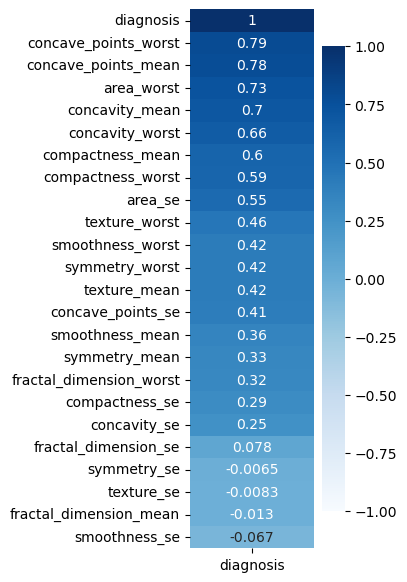

In [34]:
# visual view of correlation on numerical columns after removing highly correlated columns
# Plotting correlation with dignosis column
plt.figure(figsize=(2, 7))
heatmap = sns.heatmap(df2.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')

 - **Checking for outliers**

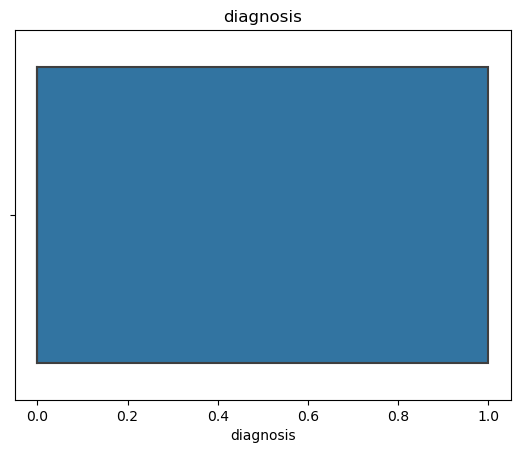

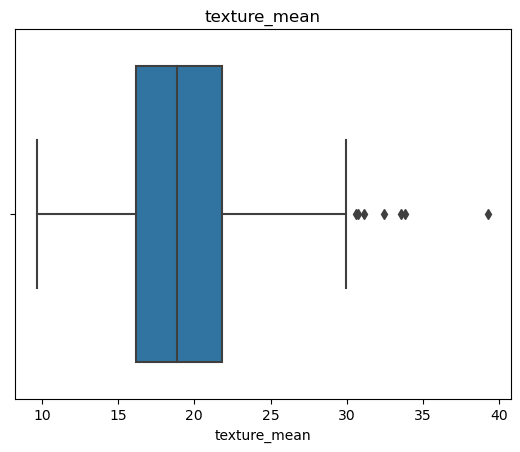

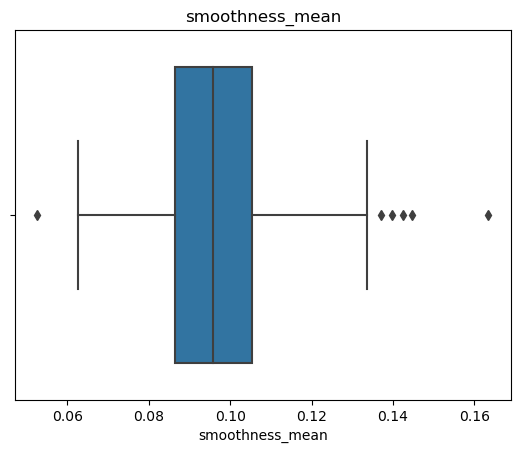

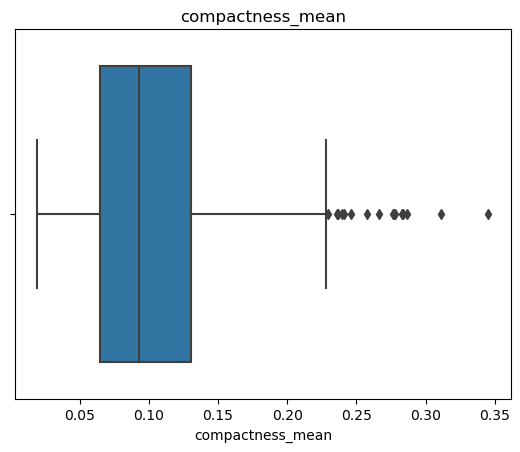

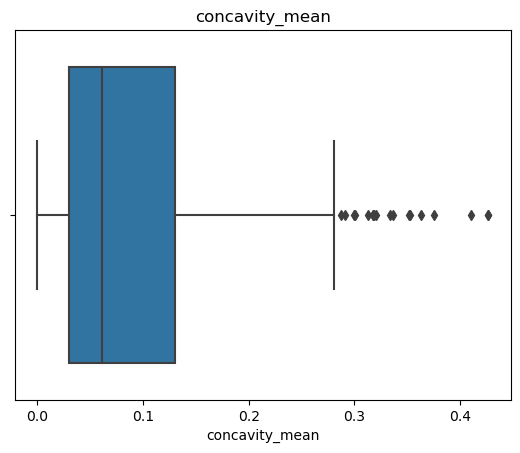

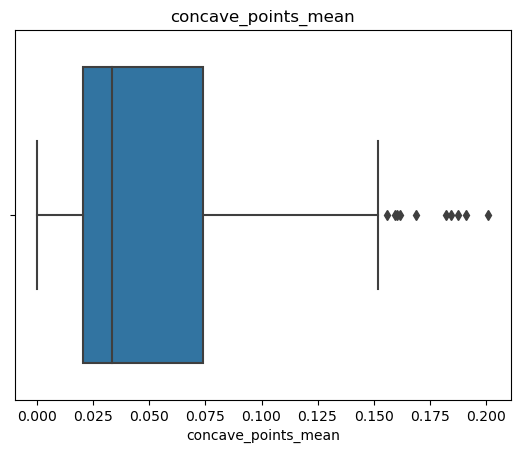

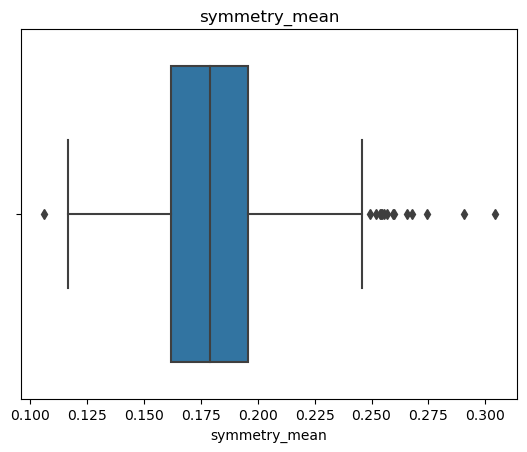

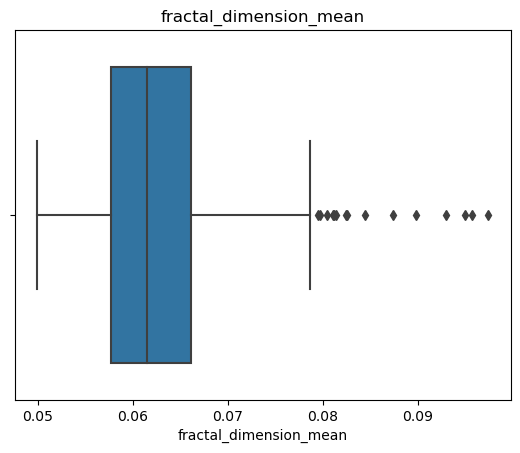

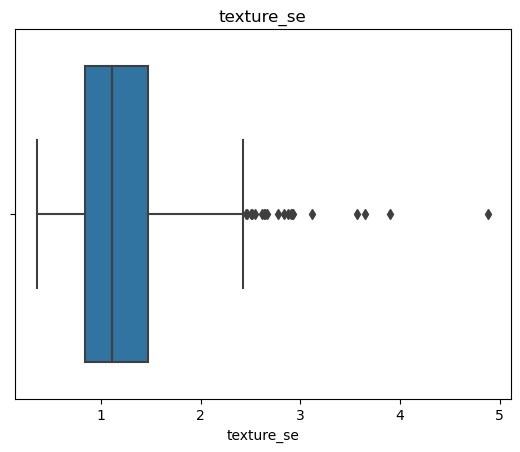

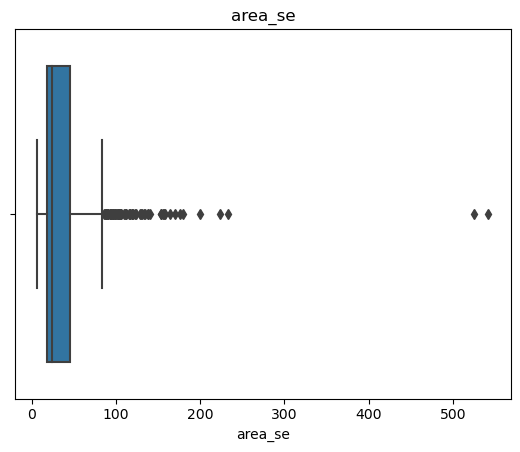

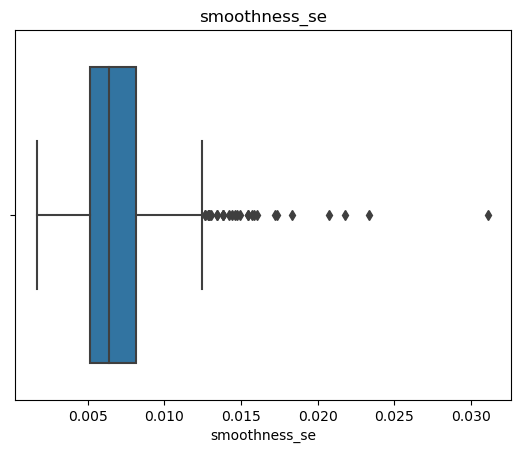

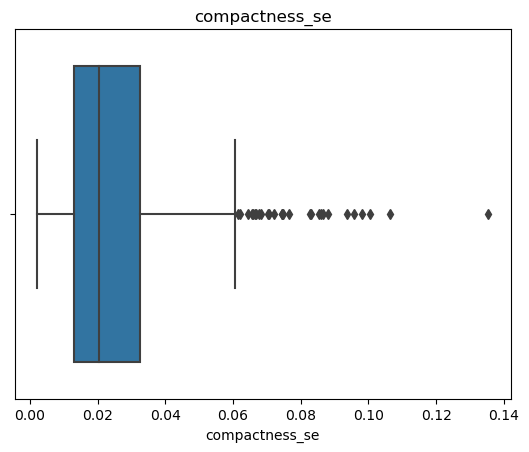

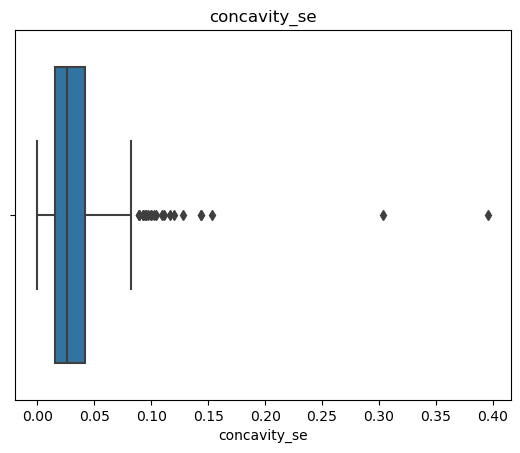

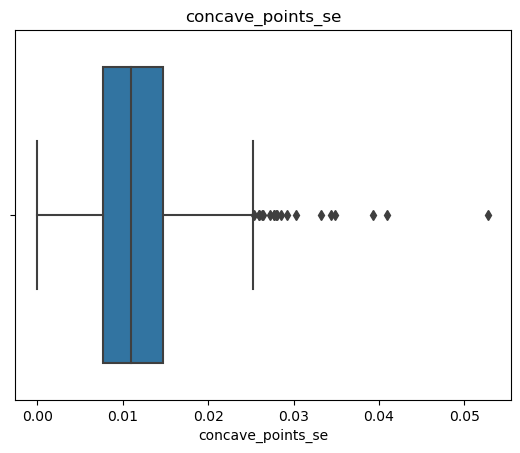

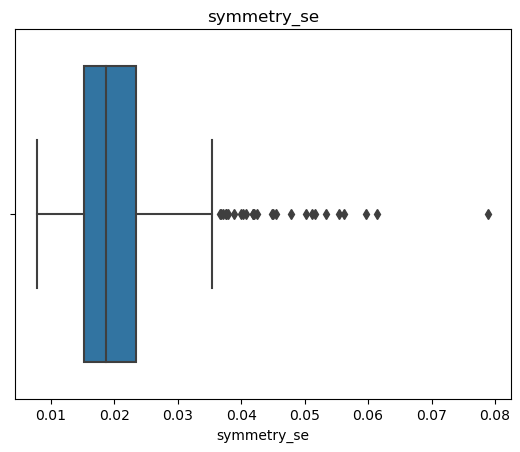

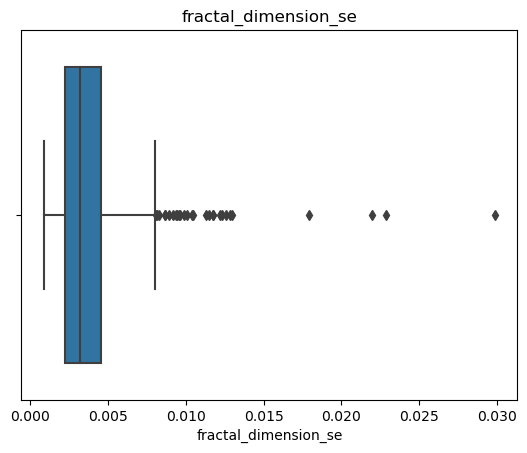

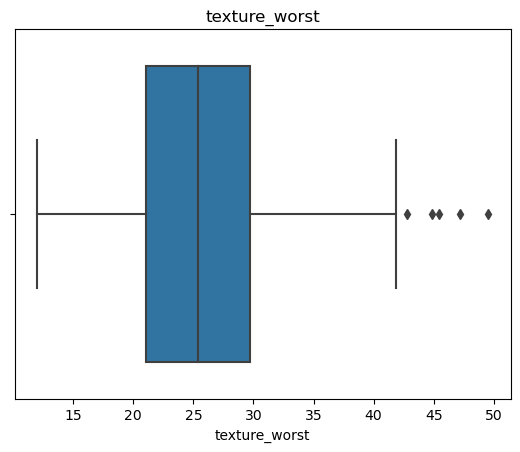

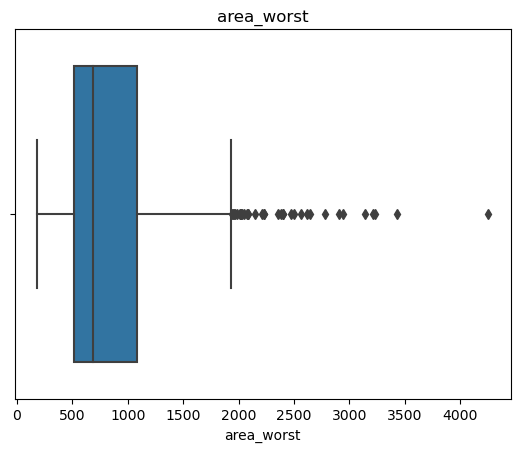

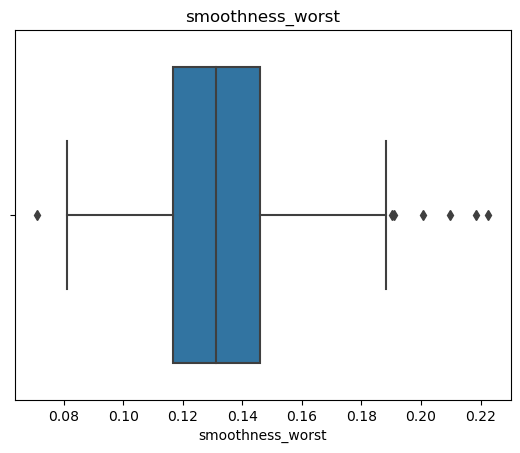

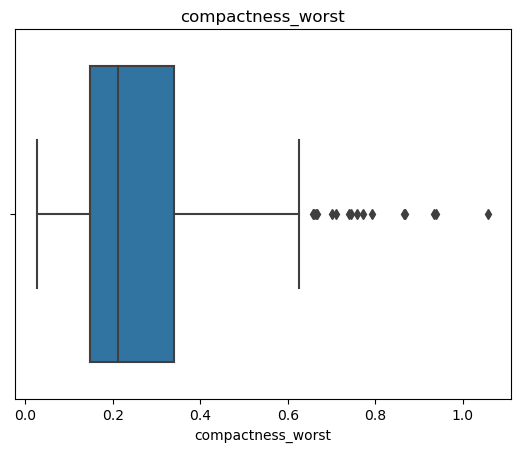

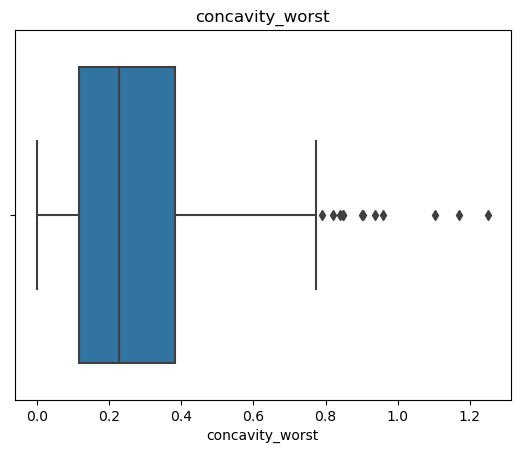

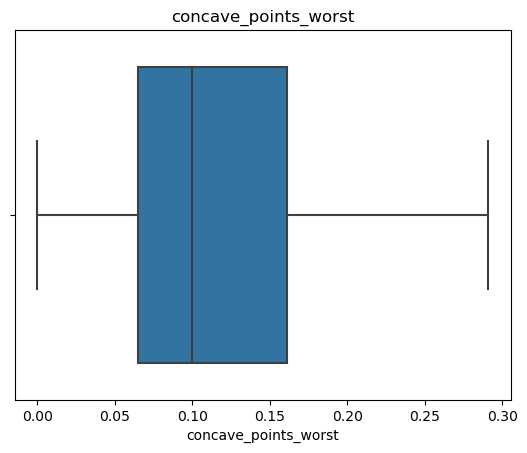

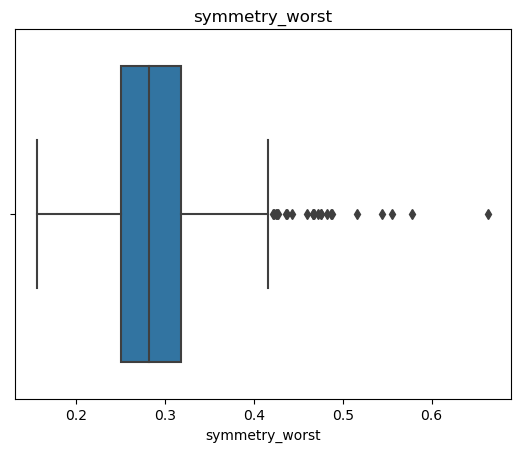

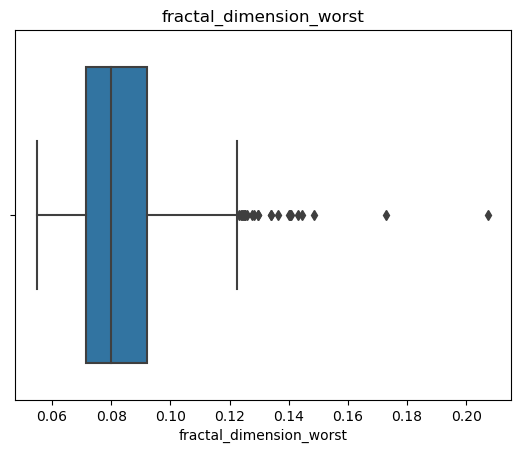

In [35]:
# Visualizing outliers
for column in df2.columns:
    sns.boxplot(x=df2[column])
    plt.title(column)
    plt.show()

 - Except **target column**, all other columns shows outliers in it.
 - Will user **IQR method** to increase the lower and upper limit of columns **to deal with the outliers.**

In [36]:
# Function to modify the upper and lower limit of IQR
def mod_limit(df):
        df1 = df2.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df2 = mod_limit(df2)

In [37]:
# Checking data set after dealing with outliers
df2.head()

diagnosis  texture_mean  smoothness_mean  compactness_mean  concavity_mean  \
0          1         10.38         0.118400           0.22862         0.28241   
1          1         17.77         0.084740           0.07864         0.08690   
2          1         21.25         0.109600           0.15990         0.19740   
3          1         20.38         0.133695           0.22862         0.24140   
4          1         14.34         0.100300           0.13280         0.19800   

   concave_points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0              0.14710         0.2419                 0.07871      0.9053   
1              0.07017         0.1812                 0.05667      0.7339   
2              0.12790         0.2069                 0.05999      0.7869   
3              0.10520         0.2464                 0.07875      1.1560   
4              0.10430         0.1809                 0.05883      0.7813   

   area_se  ...  symmetry_se  fractal_dimension_se  texture_worst  area_worst  \
0    86.20  ...      0.03003              0.006193          17.33     1937.05   
1    74.08  ...      0.01389              0.003532          23.41     1937.05   
2    86.20  ...      0.02250              0.004571          25.53     1709.00   
3    27.23  ...      0.03596              0.008023          26.50      567.70   
4    86.20  ...      0.01756              0.005115          16.67     1575.00   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622            0.62695           0.7119                0.2654   
1            0.1238            0.18660           0.2416                0.1860   
2            0.1444            0.42450           0.4504                0.2430   
3            0.1901            0.62695           0.6869                0.2575   
4            0.1374            0.20500           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0         0.41915                  0.11890  
1         0.27500                  0.08902  
2         0.36130                  0.08758  
3         0.41915                  0.12301  
4         0.23640                  0.07678  

[5 rows x 24 columns]

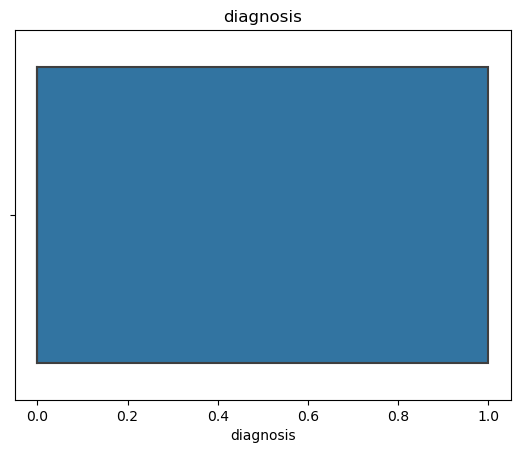

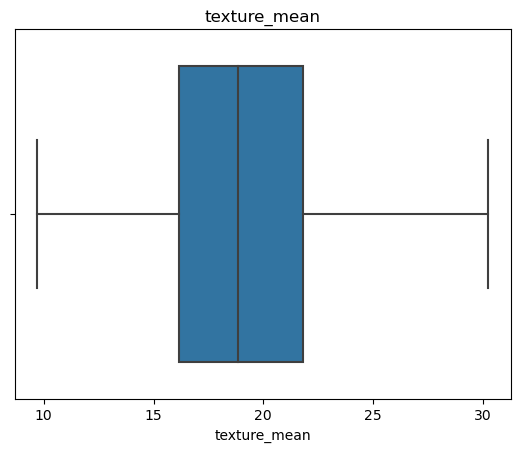

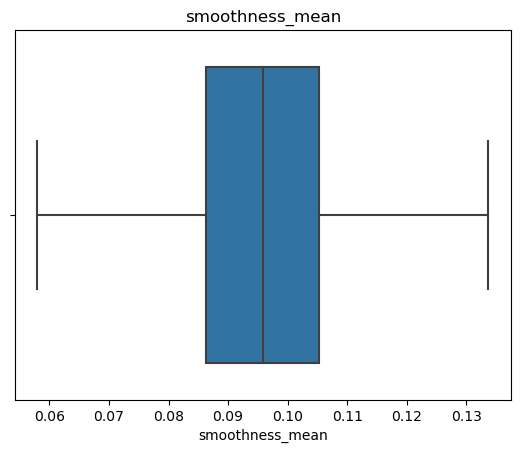

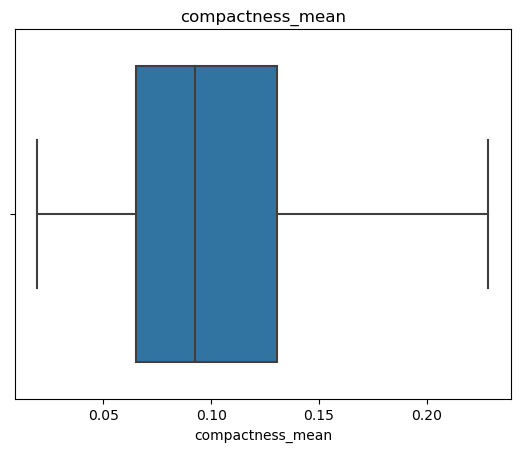

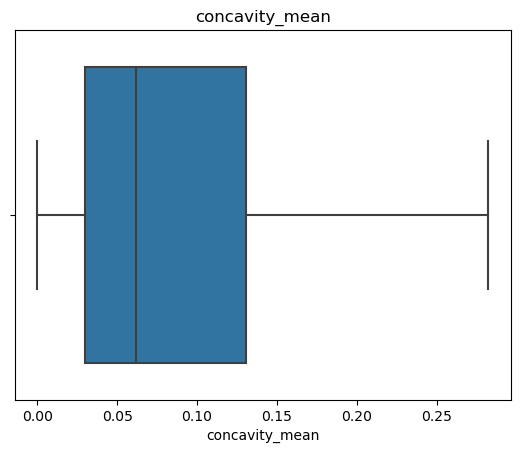

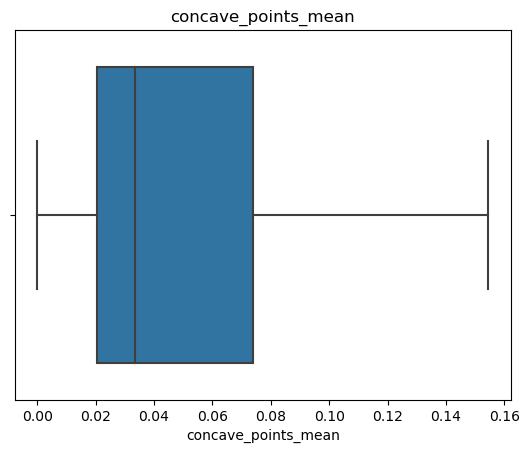

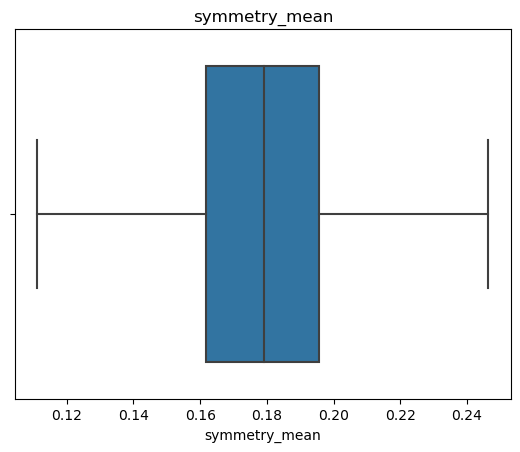

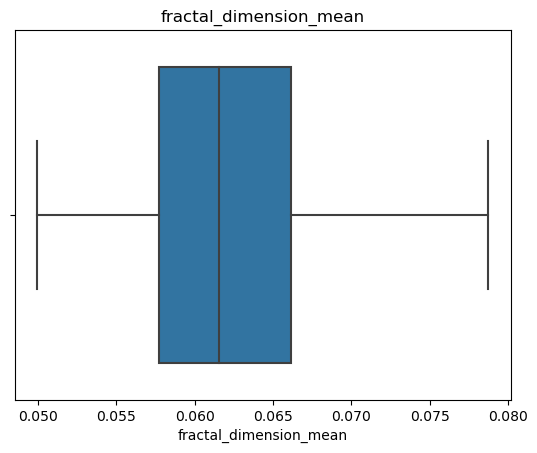

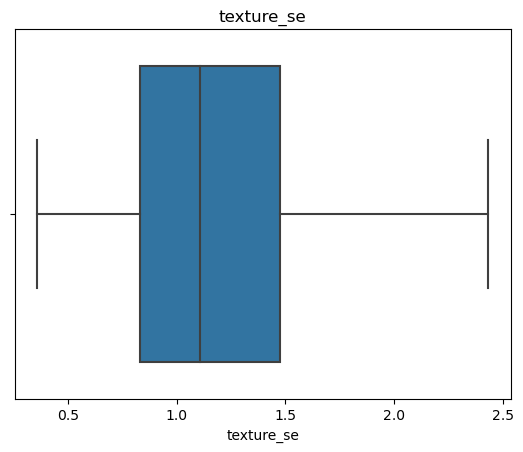

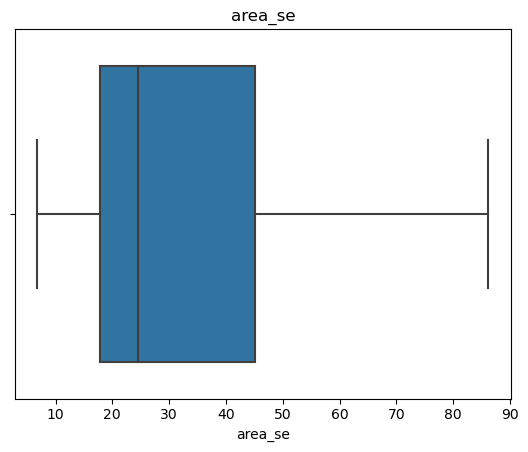

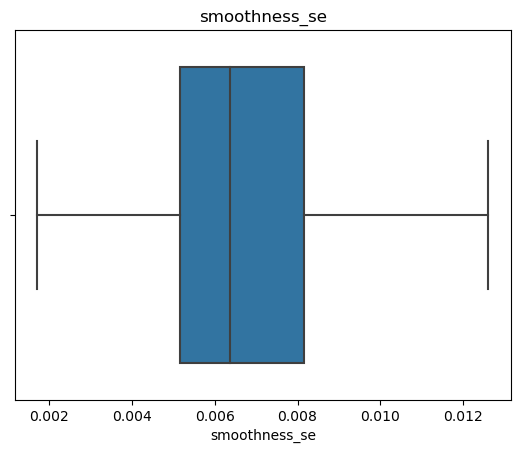

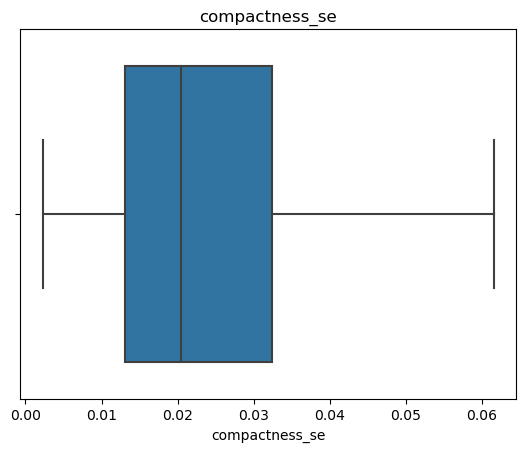

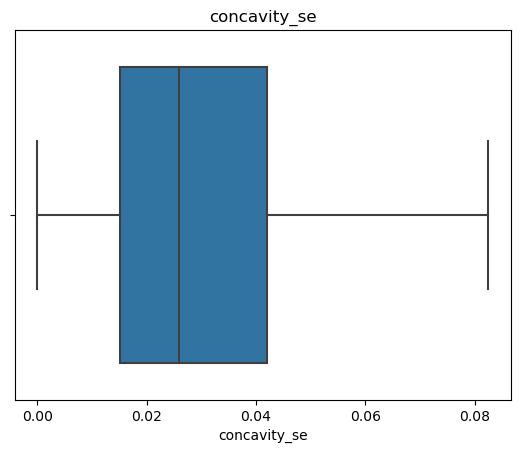

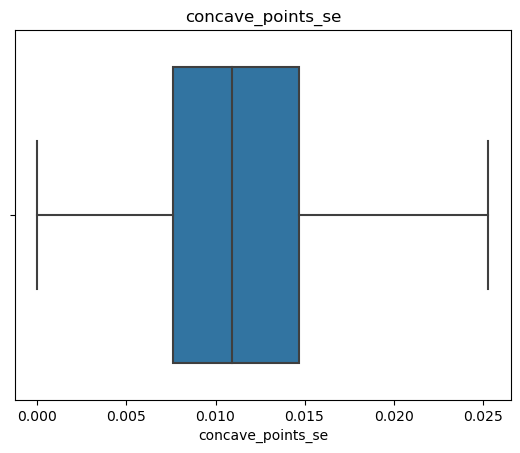

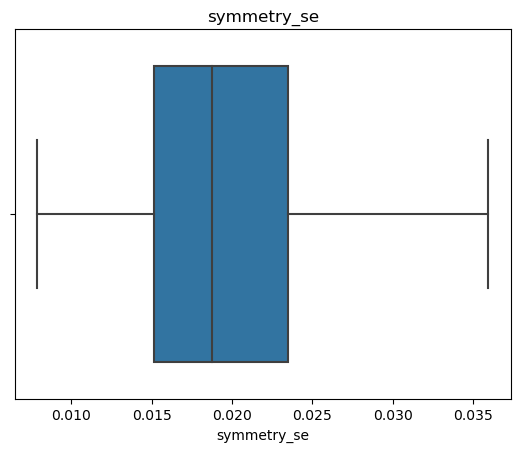

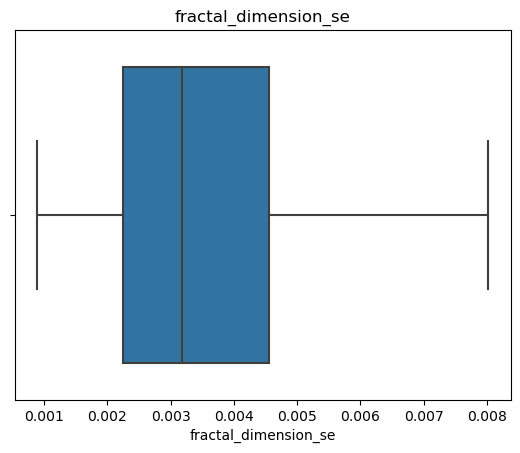

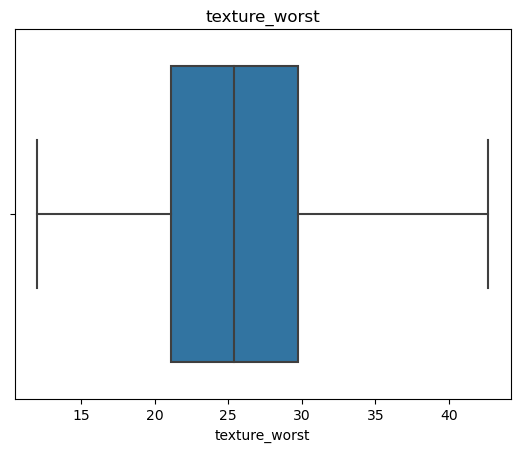

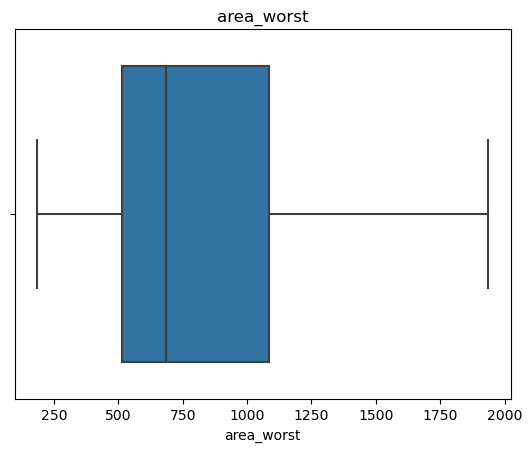

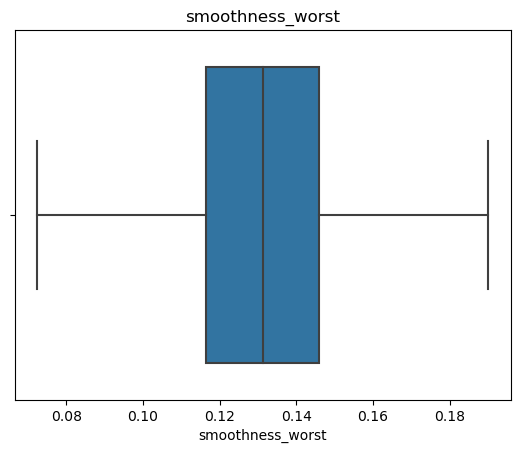

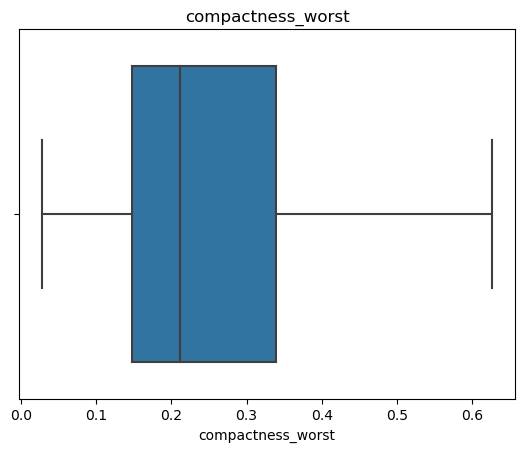

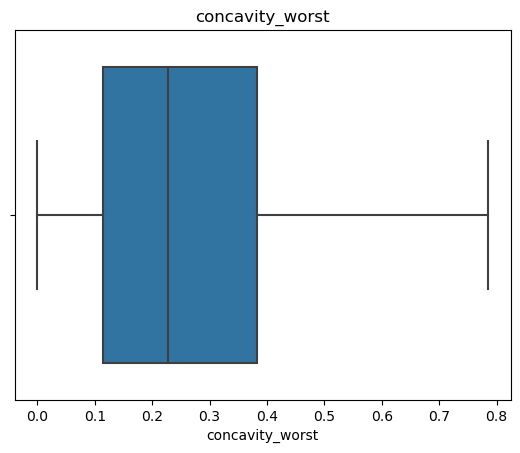

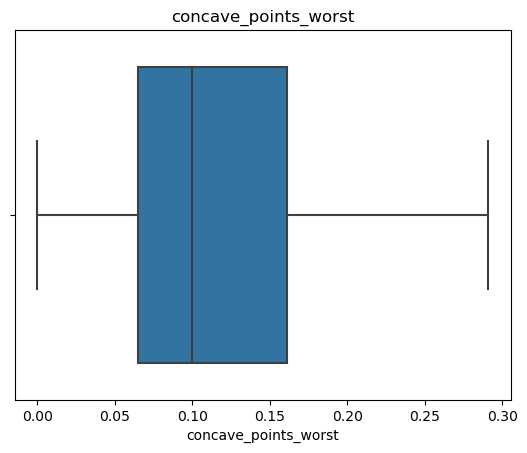

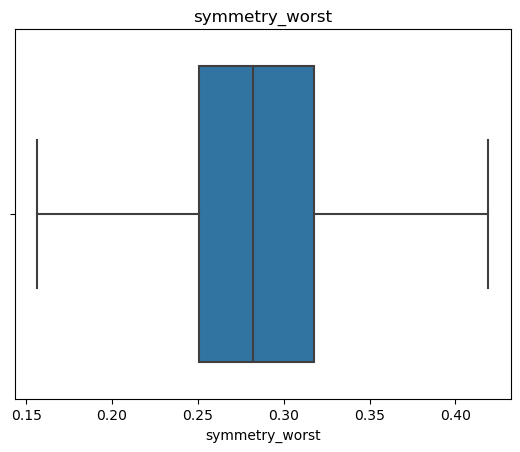

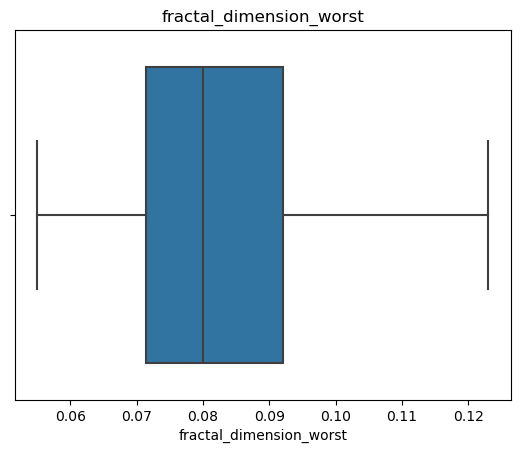

In [38]:
# Checking for columns after dealing with outliers visually.
for column in df2.columns:
    sns.boxplot(x=df2[column])
    plt.title(column)
    plt.show()

 - **As you can obseve in the above plots, all columns looks good after applying mod_limit() function.**

<a id="preparing-the-data"></a>
## <font color='blue'>Preparing The data</font>

#### Checking data distribution among the independent columns

In [39]:
df2.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [40]:
# Creating a seperate df to see the data distribution among the independent variables
df3 = df2[['texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

In [41]:
df3.head()

texture_mean  smoothness_mean  compactness_mean  concavity_mean  \
0         10.38         0.118400           0.22862         0.28241   
1         17.77         0.084740           0.07864         0.08690   
2         21.25         0.109600           0.15990         0.19740   
3         20.38         0.133695           0.22862         0.24140   
4         14.34         0.100300           0.13280         0.19800   

   concave_points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0              0.14710         0.2419                 0.07871      0.9053   
1              0.07017         0.1812                 0.05667      0.7339   
2              0.12790         0.2069                 0.05999      0.7869   
3              0.10520         0.2464                 0.07875      1.1560   
4              0.10430         0.1809                 0.05883      0.7813   

   area_se  smoothness_se  ...  symmetry_se  fractal_dimension_se  \
0    86.20       0.006399  ...      0.03003              0.006193   
1    74.08       0.005225  ...      0.01389              0.003532   
2    86.20       0.006150  ...      0.02250              0.004571   
3    27.23       0.009110  ...      0.03596              0.008023   
4    86.20       0.011490  ...      0.01756              0.005115   

   texture_worst  area_worst  smoothness_worst  compactness_worst  \
0          17.33     1937.05            0.1622            0.62695   
1          23.41     1937.05            0.1238            0.18660   
2          25.53     1709.00            0.1444            0.42450   
3          26.50      567.70            0.1901            0.62695   
4          16.67     1575.00            0.1374            0.20500   

   concavity_worst  concave_points_worst  symmetry_worst  \
0           0.7119                0.2654         0.41915   
1           0.2416                0.1860         0.27500   
2           0.4504                0.2430         0.36130   
3           0.6869                0.2575         0.41915   
4           0.4000                0.1625         0.23640   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.12301  
4                  0.07678  

[5 rows x 23 columns]

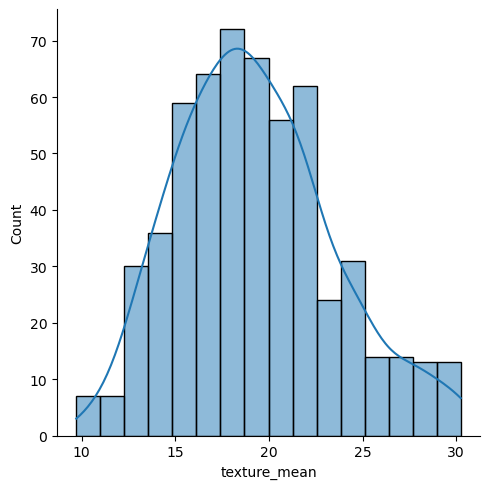

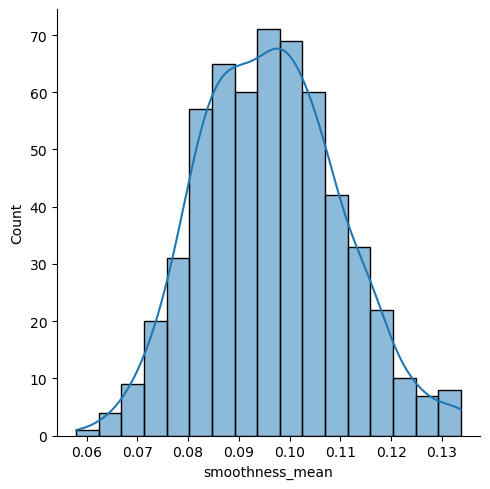

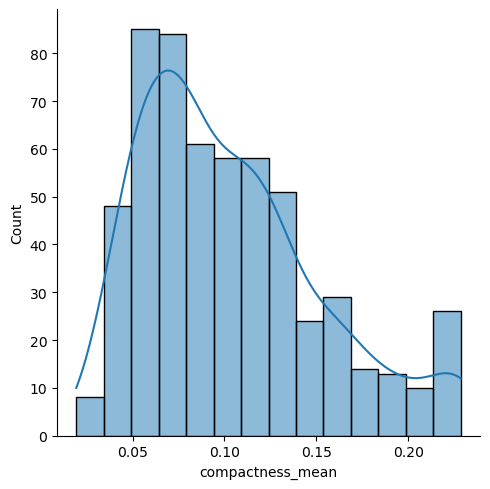

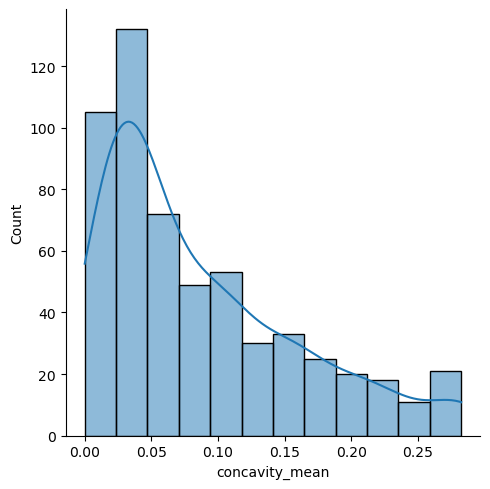

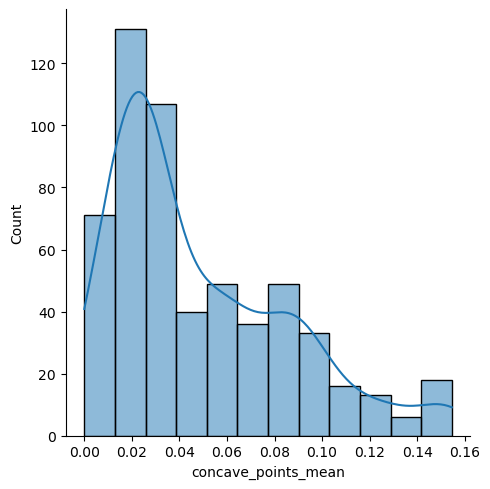

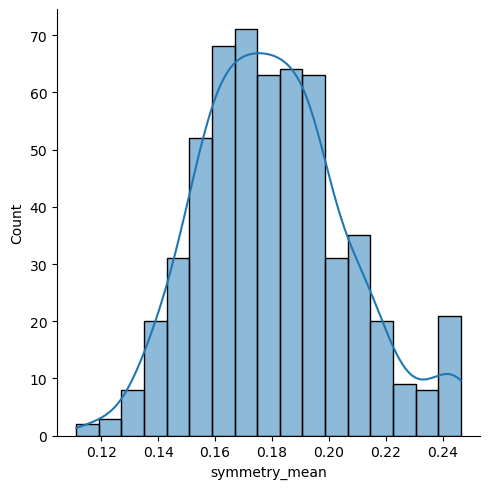

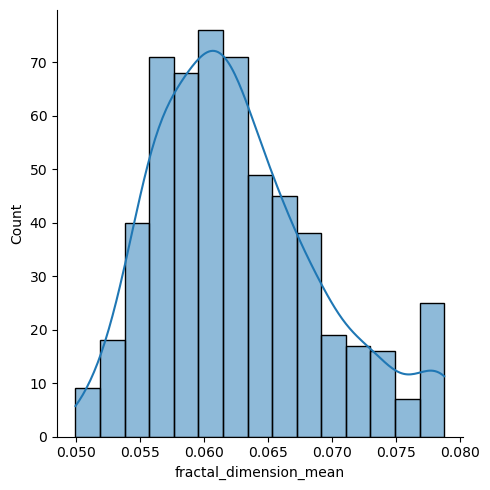

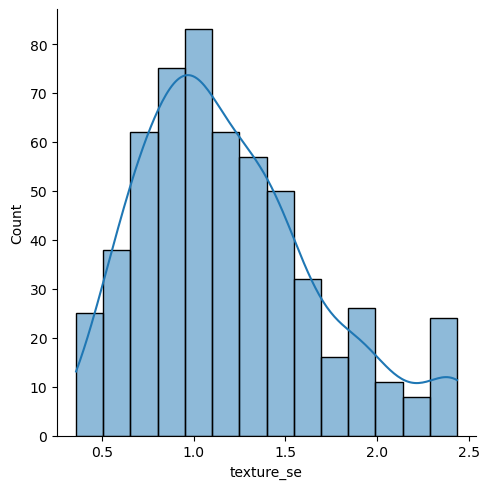

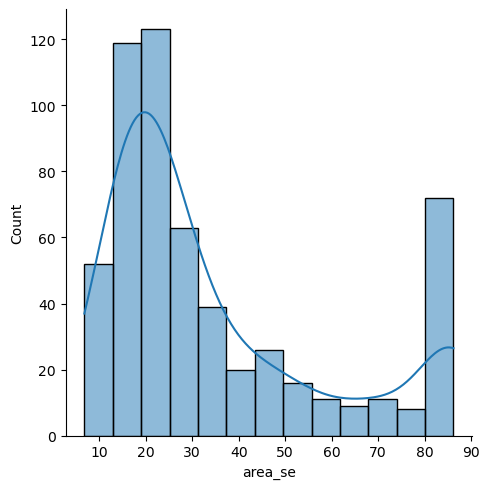

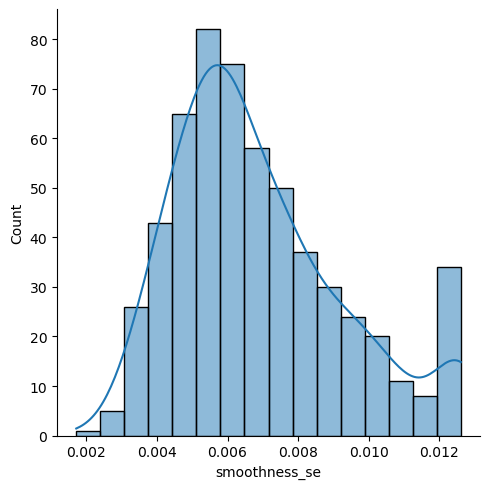

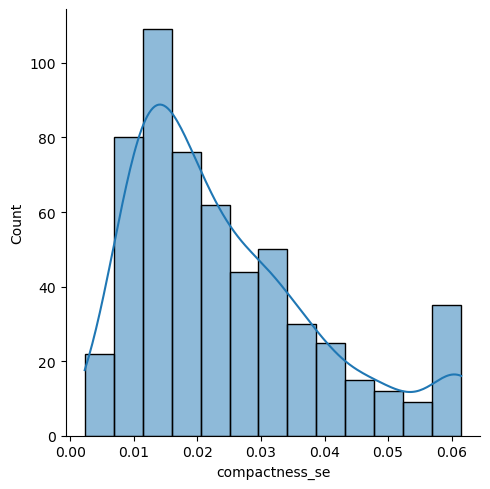

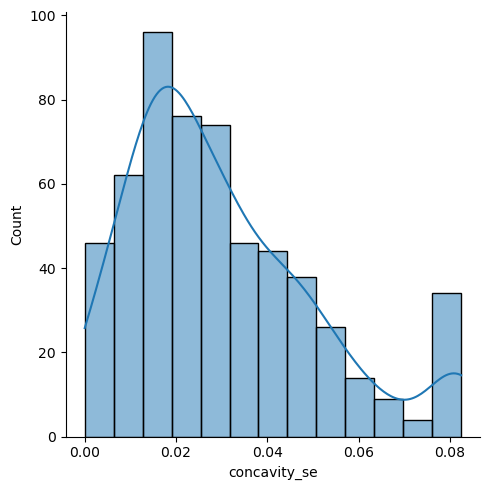

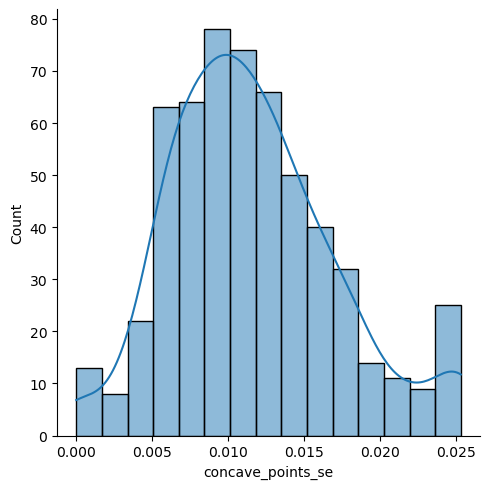

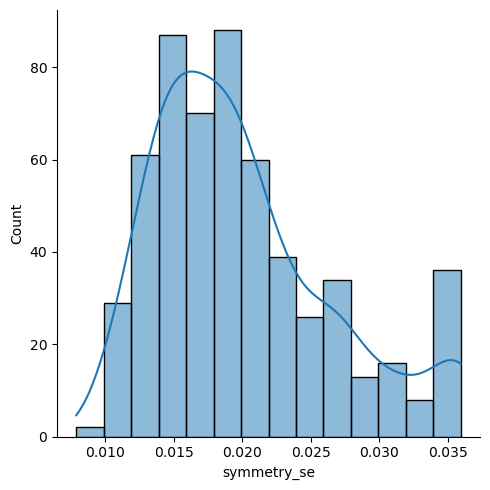

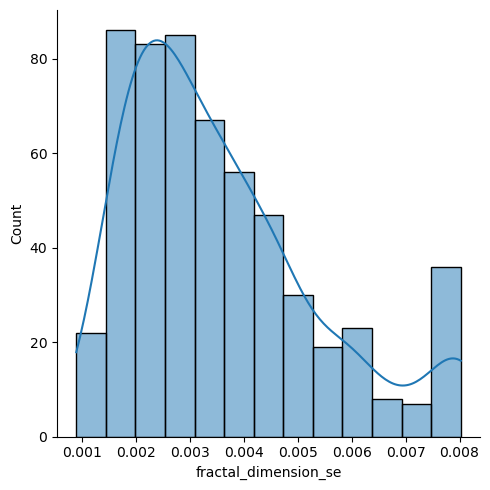

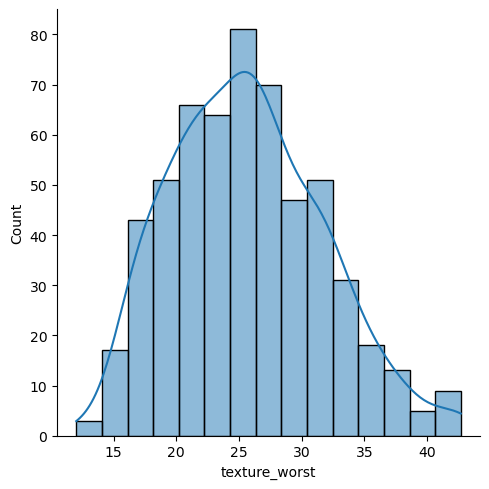

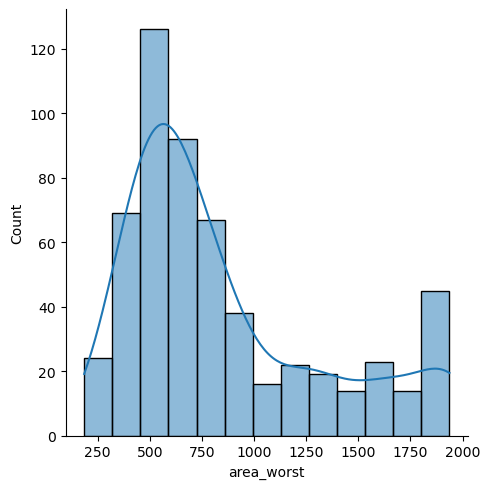

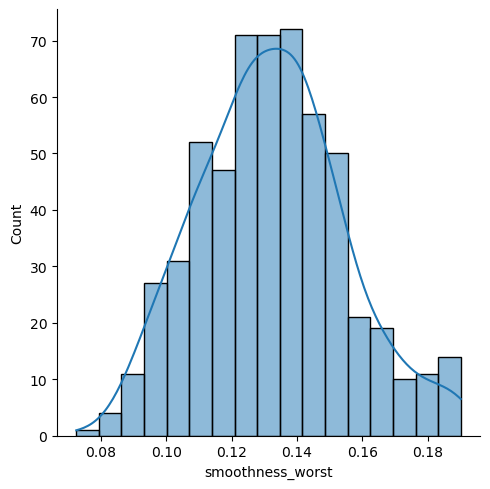

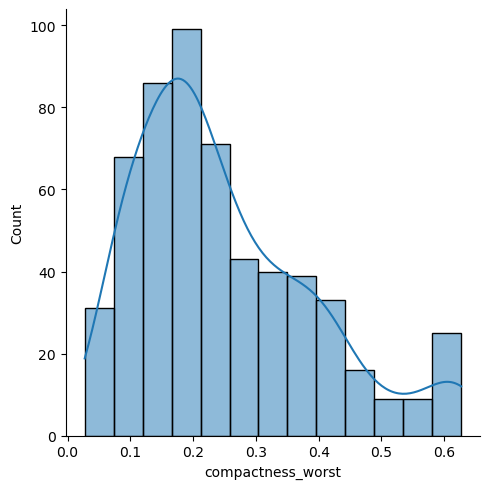

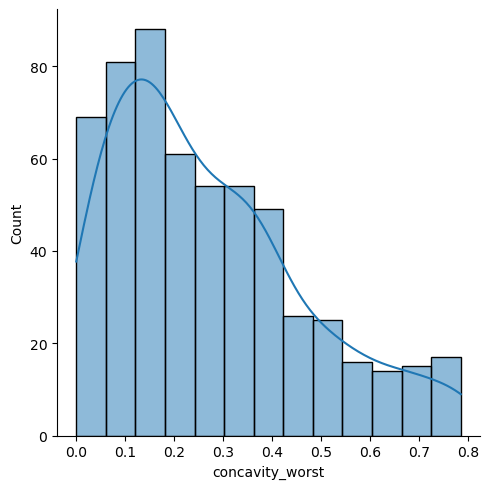

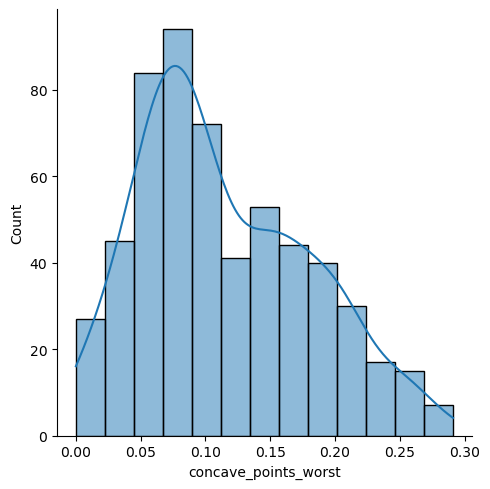

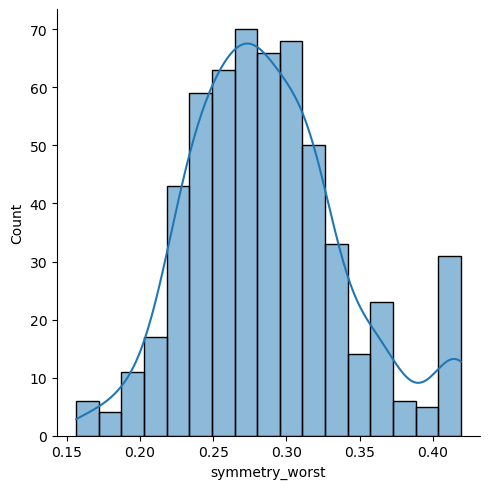

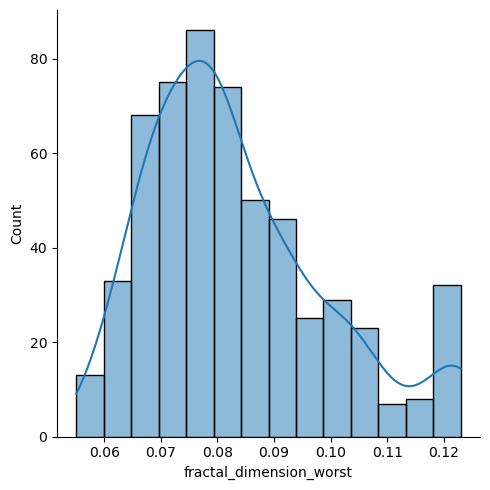

In [42]:
# Plotting a distribution graph 
for i in df3.columns:
    sns.displot(df3[i],kde=True)
    plt.show()

Looks like most of the data is **not normaly distributed** 
We will scale the data for normal distribution

In [43]:
# Annova test
from sklearn.feature_selection import chi2
import scipy.stats as stats

df_anova = df2.iloc[:,1:]  # droping target column for anova test
grps = pd.unique(df2.diagnosis.values) # creating a two groups based on diagnosis column values

coldrop = [] # creating empty list to get the column names to be dropped

for i in range(1, len(df_anova.columns)):
    # created to store the data for each group in the dignosis
    d_data = {grp:df_anova[df_anova.columns[i]][df2.diagnosis == grp] for grp in grps}

    # performing anova test for F-statistic and p-value
    F, p = stats.f_oneway(d_data[0], d_data[1])
    print("P_Value of {} and diagnosis".format(df_anova.columns[i]), p)

    if p < 0.05:
        print("There is relation between {} and diagnosis \n".format(df_anova.columns[i]))
    else:
        print("There is no relation between {} and diagnosis \n".format(df_anova.columns[i]))
        coldrop.append(df_anova.columns[i])

print(coldrop)

P_Value of smoothness_mean and diagnosis 1.4163137740079376e-19
There is relation between smoothness_mean and diagnosis 

P_Value of compactness_mean and diagnosis 6.318084542540727e-59
There is relation between compactness_mean and diagnosis 

P_Value of concavity_mean and diagnosis 1.0549156351045504e-94
There is relation between concavity_mean and diagnosis 

P_Value of concave_points_mean and diagnosis 1.3797699319830686e-121
There is relation between concave_points_mean and diagnosis 

P_Value of symmetry_mean and diagnosis 2.407674196384573e-16
There is relation between symmetry_mean and diagnosis 

P_Value of fractal_dimension_mean and diagnosis 0.8713992073289512
There is no relation between fractal_dimension_mean and diagnosis 

P_Value of texture_se and diagnosis 0.9971045652544657
There is no relation between texture_se and diagnosis 

P_Value of area_se and diagnosis 2.349510480859096e-99
There is relation between area_se and diagnosis 

P_Value of smoothness_se and diagnos

In [44]:
# Checking constant feature
var_thres = VarianceThreshold(threshold=0) # creating an object with zero threshold 
var_thres.fit(df2) # Calculate 

var_thres.get_support()

print(df2.columns[var_thres.get_support()])


constant_columns = [column for column in df2.columns
                    if column not in df2.columns[var_thres.get_support()]]
print(constant_columns)
print(len(constant_columns))

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
[]
0


In [45]:
# Dropping columns
df2 = df2.drop(columns=['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se'], axis=1)

In [46]:
df2.head()

diagnosis  texture_mean  smoothness_mean  compactness_mean  concavity_mean  \
0          1         10.38         0.118400           0.22862         0.28241   
1          1         17.77         0.084740           0.07864         0.08690   
2          1         21.25         0.109600           0.15990         0.19740   
3          1         20.38         0.133695           0.22862         0.24140   
4          1         14.34         0.100300           0.13280         0.19800   

   concave_points_mean  symmetry_mean  area_se  compactness_se  concavity_se  \
0              0.14710         0.2419    86.20        0.049040       0.05373   
1              0.07017         0.1812    74.08        0.013080       0.01860   
2              0.12790         0.2069    86.20        0.040060       0.03832   
3              0.10520         0.2464    27.23        0.061505       0.05661   
4              0.10430         0.1809    86.20        0.024610       0.05688   

   concave_points_se  fractal_dimension_se  texture_worst  area_worst  \
0            0.01587              0.006193          17.33     1937.05   
1            0.01340              0.003532          23.41     1937.05   
2            0.02058              0.004571          25.53     1709.00   
3            0.01867              0.008023          26.50      567.70   
4            0.01885              0.005115          16.67     1575.00   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622            0.62695           0.7119                0.2654   
1            0.1238            0.18660           0.2416                0.1860   
2            0.1444            0.42450           0.4504                0.2430   
3            0.1901            0.62695           0.6869                0.2575   
4            0.1374            0.20500           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0         0.41915                  0.11890  
1         0.27500                  0.08902  
2         0.36130                  0.08758  
3         0.41915                  0.12301  
4         0.23640                  0.07678

In [47]:
df2.shape

(569, 20)

**X-y Split**

In [48]:
X = df2.drop(['diagnosis'],axis = 1)
y = df2['diagnosis']

In [49]:
# Checking independent variables(X-values)
X.head()

texture_mean  smoothness_mean  compactness_mean  concavity_mean  \
0         10.38         0.118400           0.22862         0.28241   
1         17.77         0.084740           0.07864         0.08690   
2         21.25         0.109600           0.15990         0.19740   
3         20.38         0.133695           0.22862         0.24140   
4         14.34         0.100300           0.13280         0.19800   

   concave_points_mean  symmetry_mean  area_se  compactness_se  concavity_se  \
0              0.14710         0.2419    86.20        0.049040       0.05373   
1              0.07017         0.1812    74.08        0.013080       0.01860   
2              0.12790         0.2069    86.20        0.040060       0.03832   
3              0.10520         0.2464    27.23        0.061505       0.05661   
4              0.10430         0.1809    86.20        0.024610       0.05688   

   concave_points_se  fractal_dimension_se  texture_worst  area_worst  \
0            0.01587              0.006193          17.33     1937.05   
1            0.01340              0.003532          23.41     1937.05   
2            0.02058              0.004571          25.53     1709.00   
3            0.01867              0.008023          26.50      567.70   
4            0.01885              0.005115          16.67     1575.00   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622            0.62695           0.7119                0.2654   
1            0.1238            0.18660           0.2416                0.1860   
2            0.1444            0.42450           0.4504                0.2430   
3            0.1901            0.62695           0.6869                0.2575   
4            0.1374            0.20500           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0         0.41915                  0.11890  
1         0.27500                  0.08902  
2         0.36130                  0.08758  
3         0.41915                  0.12301  
4         0.23640                  0.07678

In [50]:
# Checking idependent variable(Y-values)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

#### Feature Scaling

In [51]:
# Scaling independent variables
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

#### Spliting data into traing and testing data sets.

In [52]:
# Defining train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 42)

 - **Checking train-test data sets**

In [53]:
# Checking shape of X_train data
X_train.shape

(455, 19)

In [54]:
# Checking shape of y_train data
y_train.shape

(455,)

In [55]:
# Checking shape of X_test data
X_test.shape

(114, 19)

In [56]:
# Checking shape of y_test data
y_test.shape

(114,)

 - **Checking for imbalanced data**

In [57]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

 - There is a slight imbalance in the data so we will use **'Random Over-Sampling'** is a technique, as one class (minority class) has significantly fewer samples than the other class (majority class)

In [58]:
os =  RandomOverSampler(sampling_strategy=1)

X_train, y_train = os.fit_resample(X_train, y_train)

print(len(y_train[y_train==0]), len(y_train[y_train==1]))
print(len(X_train))

286 286
572


<a id="models-building"></a>
## <font color='blue'>Models Building</font>

 - **Without any parameter tuning**

In [59]:
# Function to build a models
models = [LogisticRegression(),
          DecisionTreeClassifier(criterion='entropy', max_depth=3),
          RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=8, max_features='sqrt'),
          KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2),
          SVC(gamma=0.01, C=10, kernel='rbf', probability=True),
          XGBClassifier(min_child_weight=1, max_depth=12, learning_rate=0.2, gamma=0.0, colsample_bytree=0.3)]

def evaluate_models(X, y,models=[]):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for model in models:
        # Fitting the model
        model.fit(X_train, y_train)
        
        # Evaluate accuracy
        accuracy = model.score(X_test, y_test)
        print(f"Accuracy for {type(model).__name__}: {accuracy}")

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(4,4))
        ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 15})
        plt.title(f"Confusion Matrix - {type(model).__name__}",fontsize=16)
        plt.xlabel("Predicted Label",fontsize=14)
        plt.ylabel("True Label",fontsize=14)
        # Access the color bar object and set the font size for the side labels
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=12)
        plt.show()
        
        ## Learning Curve
        # Creating the learning curve data points using the learning_curve function:
        train_sizes, train_scores, val_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), 
                                                               cv=5, scoring='accuracy')

        # Calculating the mean and standard deviation of training and validation scores for each training size:
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        # Plotting the learning curv
        plt.figure(figsize=(6, 4))
        plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o',markersize=6)
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,linewidth=1)
        plt.plot(train_sizes, val_mean, label='Validation Accuracy', marker='o',markersize=6)
        plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1,linewidth=1)
        plt.xlabel('Training Set Size',fontsize=14)
        plt.ylabel('Accuracy',fontsize=14)
        plt.title(f'Learning Curve - {type(model).__name__}',fontsize=16)
        plt.legend(loc='lower right',fontsize=10)
        plt.grid(True)
        plt.show()
        
        # Print classification report
        report = classification_report(y_test, y_pred)
        print(f"Classification Report for {type(model).__name__}:\n{report}\n")
        #plot_roc_curve(X_test, y_test, models)
        
        #Plot AUC curve
        plt.figure(figsize=(6, 4))

        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)

        plt.plot(fpr, tpr, label=f"{type(model).__name__}, AUC={auc:.2f}")

        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
        plt.xlabel('False Positive Rate',fontsize=14)
        plt.ylabel('True Positive Rate',fontsize=14)
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {type(model).__name__}',fontsize=16)
        plt.legend(loc='lower right',fontsize=10)
        plt.show()
        print('--'*50)

Accuracy for LogisticRegression: 0.9824561403508771


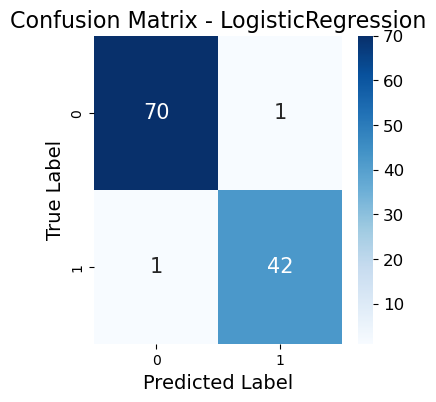

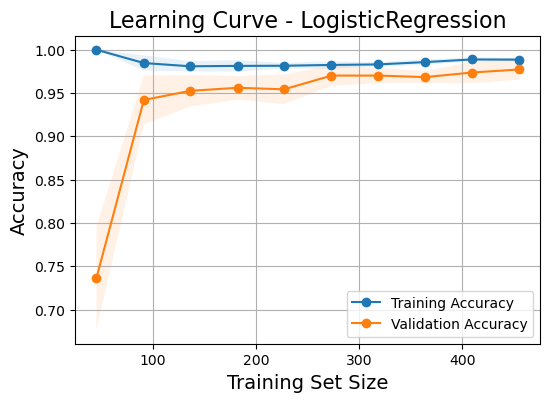

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114




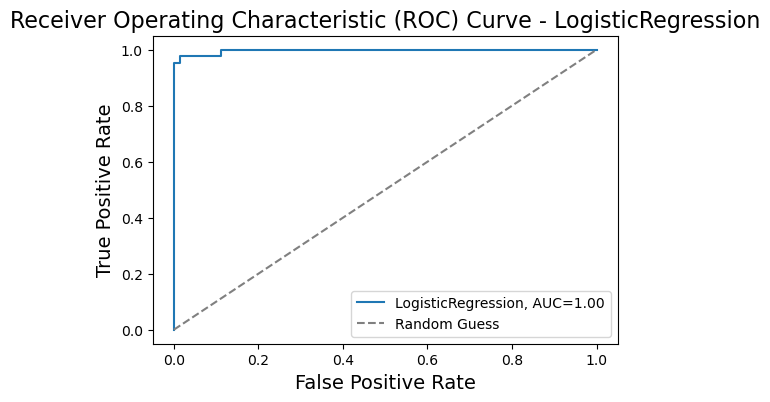

----------------------------------------------------------------------------------------------------
Accuracy for DecisionTreeClassifier: 0.9473684210526315


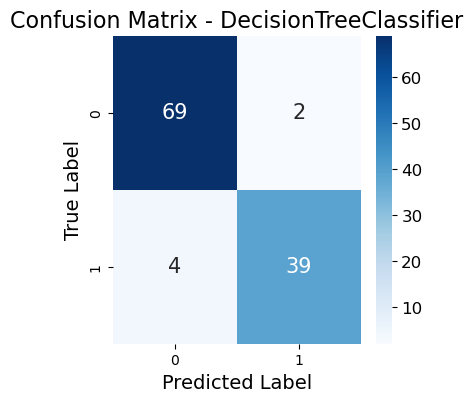

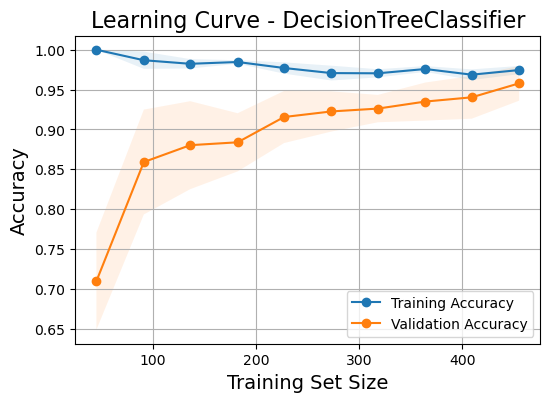

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114




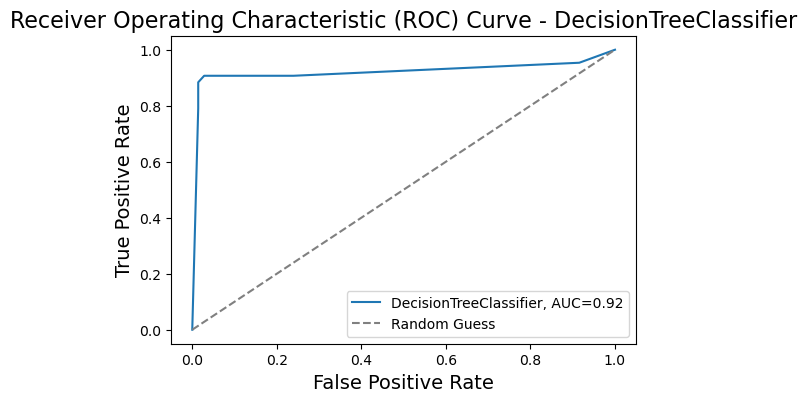

----------------------------------------------------------------------------------------------------
Accuracy for RandomForestClassifier: 0.956140350877193


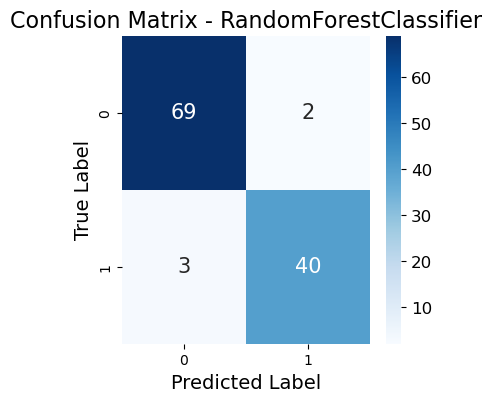

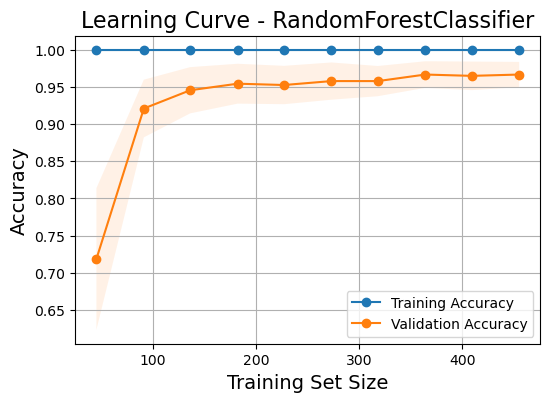

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114




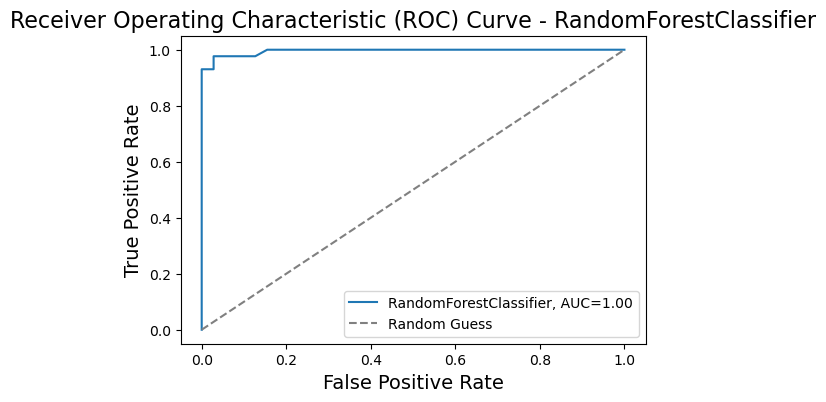

----------------------------------------------------------------------------------------------------
Accuracy for KNeighborsClassifier: 0.9473684210526315


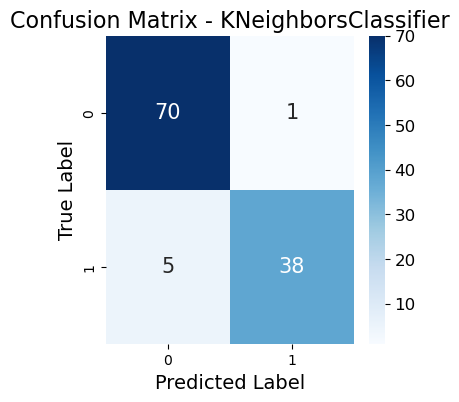

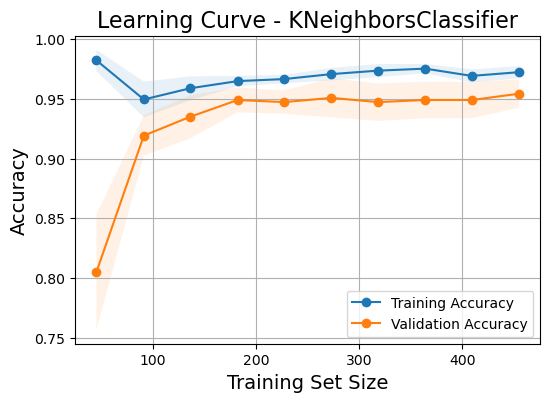

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114




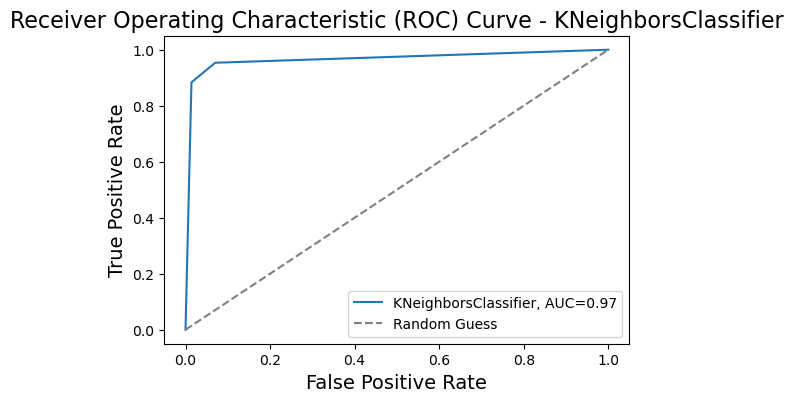

----------------------------------------------------------------------------------------------------
Accuracy for SVC: 0.9824561403508771


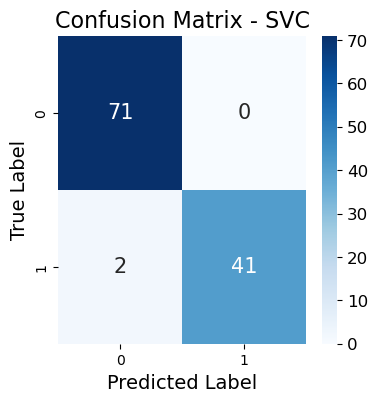

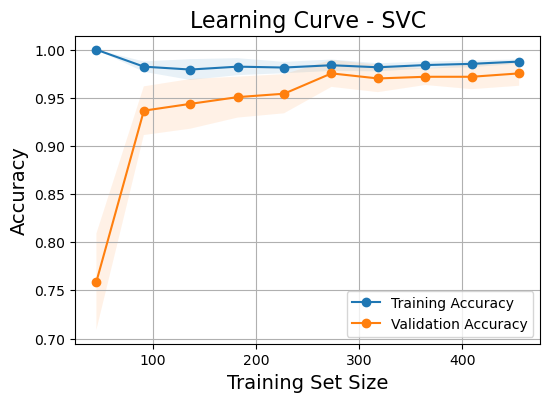

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114




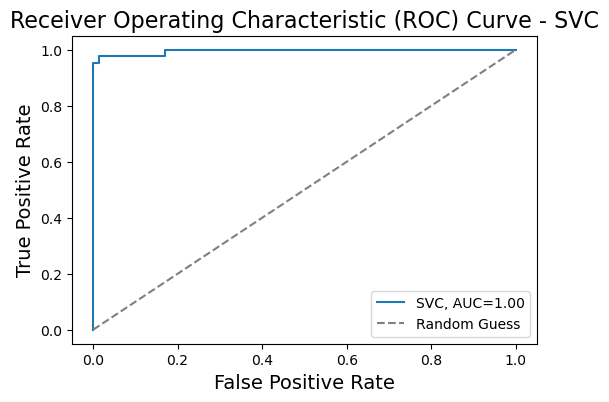

----------------------------------------------------------------------------------------------------
Accuracy for XGBClassifier: 0.9736842105263158


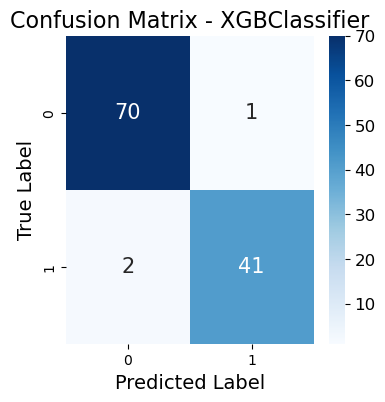

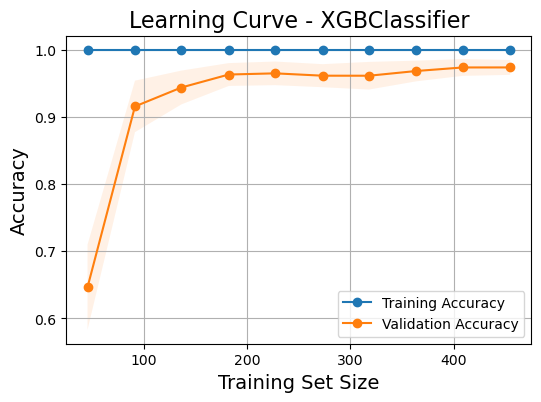

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




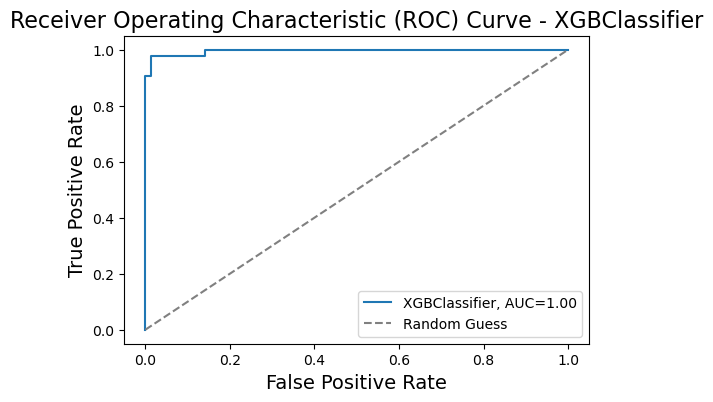

----------------------------------------------------------------------------------------------------


In [60]:
evaluate_models(X_scaled,y,models)

<a id="models-enhancement"></a>
## <font color='blue'>Models enhancement</font>

#### Feature Importance

From the above models accuracy and confusion matrix results, SVC model shows the great results so we will choose the SVC model to get the important features.

In [61]:
X = pd.DataFrame(X,columns=df2.columns)

In [62]:
X.head()

diagnosis  texture_mean  smoothness_mean  compactness_mean  concavity_mean  \
0        NaN         10.38         0.118400           0.22862         0.28241   
1        NaN         17.77         0.084740           0.07864         0.08690   
2        NaN         21.25         0.109600           0.15990         0.19740   
3        NaN         20.38         0.133695           0.22862         0.24140   
4        NaN         14.34         0.100300           0.13280         0.19800   

   concave_points_mean  symmetry_mean  area_se  compactness_se  concavity_se  \
0              0.14710         0.2419    86.20        0.049040       0.05373   
1              0.07017         0.1812    74.08        0.013080       0.01860   
2              0.12790         0.2069    86.20        0.040060       0.03832   
3              0.10520         0.2464    27.23        0.061505       0.05661   
4              0.10430         0.1809    86.20        0.024610       0.05688   

   concave_points_se  fractal_dimension_se  texture_worst  area_worst  \
0            0.01587              0.006193          17.33     1937.05   
1            0.01340              0.003532          23.41     1937.05   
2            0.02058              0.004571          25.53     1709.00   
3            0.01867              0.008023          26.50      567.70   
4            0.01885              0.005115          16.67     1575.00   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622            0.62695           0.7119                0.2654   
1            0.1238            0.18660           0.2416                0.1860   
2            0.1444            0.42450           0.4504                0.2430   
3            0.1901            0.62695           0.6869                0.2575   
4            0.1374            0.20500           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0         0.41915                  0.11890  
1         0.27500                  0.08902  
2         0.36130                  0.08758  
3         0.41915                  0.12301  
4         0.23640                  0.07678

In [75]:
X = df2.drop(['diagnosis'],axis=1)

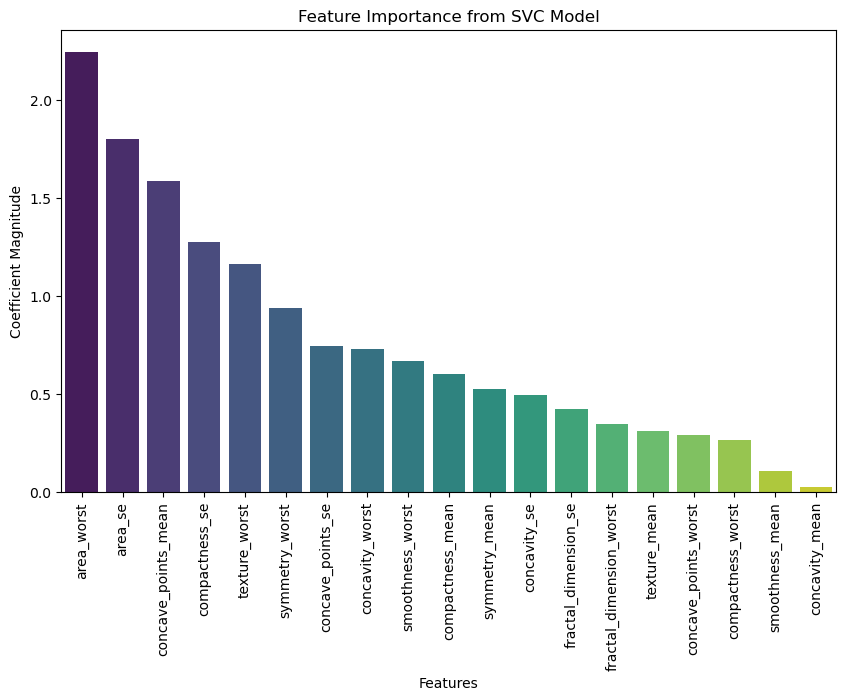

In [76]:
# Train the SVC model
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Get the coefficients of the linear kernel
coefficients = svc_model.coef_[0]

# Map coefficients to feature names

feature_names = X.columns
feature_importance = pd.Series(coefficients, index=feature_names)

# Sort the feature importances
feature_importance = feature_importance.abs().sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance from SVC Model')
plt.show()

In [77]:
feature_importance

area_worst                 2.244569
area_se                    1.800490
concave_points_mean        1.584820
compactness_se             1.274413
texture_worst              1.164219
symmetry_worst             0.939683
concave_points_se          0.742053
concavity_worst            0.728251
smoothness_worst           0.665802
compactness_mean           0.599684
symmetry_mean              0.522437
concavity_se               0.494031
fractal_dimension_se       0.422168
fractal_dimension_worst    0.345892
texture_mean               0.312159
concave_points_worst       0.287941
compactness_worst          0.265969
smoothness_mean            0.107331
concavity_mean             0.022229
dtype: float64

In [78]:
# Selecting a features which are having a importance 0.5 and above

imp_features = []

# Loop through the feature_importance list and select features with importance greater than 0.5
for feature, importance in feature_importance.items():
    if importance > 0.5:
        imp_features.append(feature)

print("Selected features with importance greater than 0.5:")
print(imp_features)

Selected features with importance greater than 0.5:
['area_worst', 'area_se', 'concave_points_mean', 'compactness_se', 'texture_worst', 'symmetry_worst', 'concave_points_se', 'concavity_worst', 'smoothness_worst', 'compactness_mean', 'symmetry_mean']


 - **Defining a new value of X dependeing on the important features**

In [64]:
X_new = df2[['area_worst', 'area_se', 'concave_points_mean', 'compactness_se', 'symmetry_worst', 'texture_worst', 'compactness_worst', 'concavity_worst']]

In [65]:
X_new.head()

area_worst  area_se  concave_points_mean  compactness_se  symmetry_worst  \
0     1937.05    86.20              0.14710        0.049040         0.41915   
1     1937.05    74.08              0.07017        0.013080         0.27500   
2     1709.00    86.20              0.12790        0.040060         0.36130   
3      567.70    27.23              0.10520        0.061505         0.41915   
4     1575.00    86.20              0.10430        0.024610         0.23640   

   texture_worst  compactness_worst  concavity_worst  
0          17.33            0.62695           0.7119  
1          23.41            0.18660           0.2416  
2          25.53            0.42450           0.4504  
3          26.50            0.62695           0.6869  
4          16.67            0.20500           0.4000

In [66]:
# Scaling independent variables X_new
X_new = ss.fit_transform(X_new)

In [67]:
# Defining train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new,y,test_size = 0.2,random_state = 42)

#### Hyper Parameter Tuning

In [68]:
# lets Make a function for Grid Search CV
def model_gridsearchCV(model,param_grid,X,y,data_X,data_y):

    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    
    # Fit all models with all hyperparameter configuration
    clf.fit(X_train1,y_train1)
    print("The best parameter found on development set is :")
    
    # this will gie us our best parameter to use
    print(clf.best_params_)
    print("\nThe best estimator is",clf.best_estimator_)
    print("The best score is",round(clf.best_score_*100,2), '%')
    
    
    # Evaluate accuracy
    #accuracy = model.score(X_test, y_test)
    #print(f"Accuracy for {type(model).__name__}: {accuracy}")

    # Make predictions
    y_pred = model.predict(X_test1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test1, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(4,4))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 15})
    plt.title(f"Confusion Matrix - {type(model).__name__}",fontsize=16)
    plt.xlabel("Predicted Label",fontsize=14)
    plt.ylabel("True Label",fontsize=14)
    # Access the color bar object and set the font size for the side labels
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    plt.show()
    
    ## Learning Curve
    # Creating the learning curve data points using the learning_curve function:
    train_sizes, train_scores, val_scores = learning_curve(model, X_new, y, train_sizes=np.linspace(0.1, 1.0, 10), 
                                                               cv=5, scoring='accuracy')

    # Calculating the mean and standard deviation of training and validation scores for each training size:
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plotting the learning curv
    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o',markersize=6)
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,linewidth=1)
    plt.plot(train_sizes, val_mean, label='Validation Accuracy', marker='o',markersize=6)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1,linewidth=1)
    plt.xlabel('Training Set Size',fontsize=14)
    plt.ylabel('Accuracy',fontsize=14)
    plt.title(f'Learning Curve - {type(model).__name__}',fontsize=16)
    plt.legend(loc='lower right',fontsize=10)
    plt.grid(True)
    plt.show()
    print('--'*50)

 - Logistic regression parameter tuning

The best parameter found on development set is :
{'C': 1, 'solver': 'lbfgs'}

The best estimator is LogisticRegression(C=1)
The best score is 97.79 %


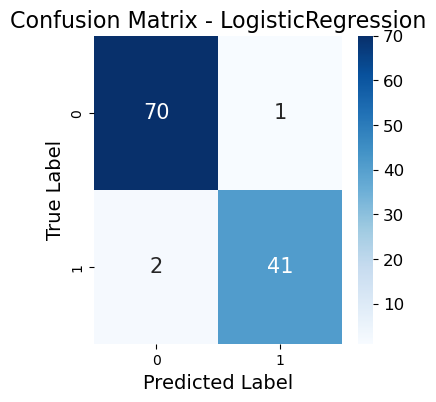

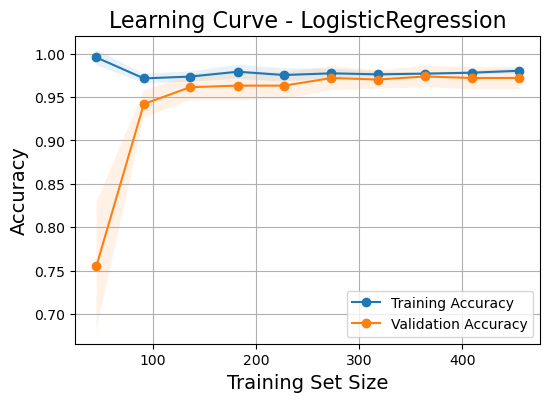

----------------------------------------------------------------------------------------------------


In [69]:
# Defining param grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
    }

# Defining model
model_lr = LogisticRegression()
model_lr.fit(X_train1, y_train1)

# Function to find best parameter
model_gridsearchCV(model_lr,param_grid_lr,X_new,y,X_train1,y_train1)

 - Decision Tree Parameter Tuning

The best parameter found on development set is :
{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}

The best estimator is DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=10,
                       max_features='log2', min_samples_leaf=4,
                       min_samples_split=10)
The best score is 95.84 %


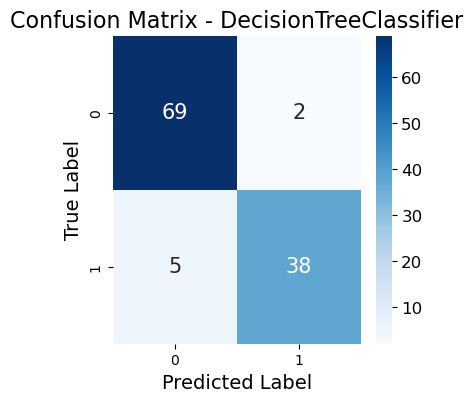

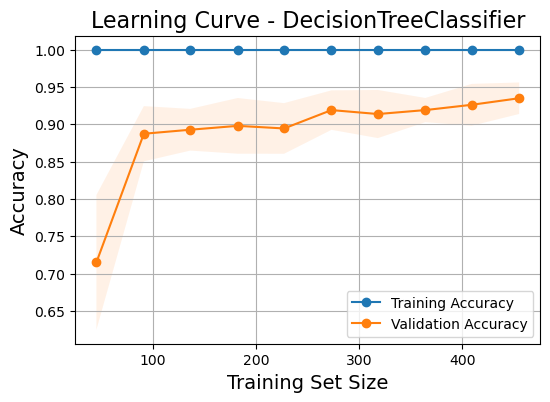

----------------------------------------------------------------------------------------------------


In [81]:
# Defining param grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],     # Split criterion: Gini impurity or information gain (entropy)
    'splitter': ['best', 'random'],       # Strategy to choose the split at each node: best or random
    'max_depth': [10, 20, 30],      # Maximum depth of the tree (None means unlimited depth)
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'ccp_alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0] # Complexity parameter used for Minimal Cost-Complexity Pruning
}

# Defining model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train1, y_train1)
# Function to find best parameter
model_gridsearchCV(model_dt,param_grid_dt,X_new,y,X_train1,y_train1)

 - Random Forest Classifier Parameter tuning

The best parameter found on development set is :
{'bootstrap': False, 'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 80}

The best estimator is RandomForestClassifier(bootstrap=False, ccp_alpha=0.001, max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=80)
The best score is 97.36 %


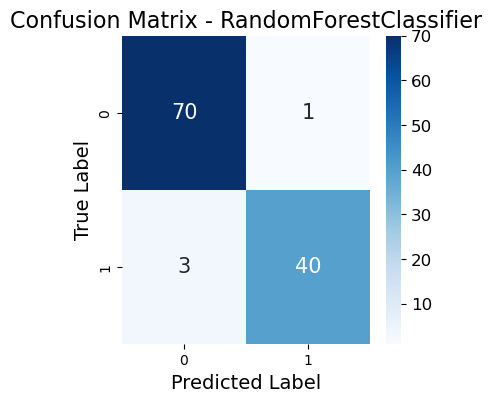

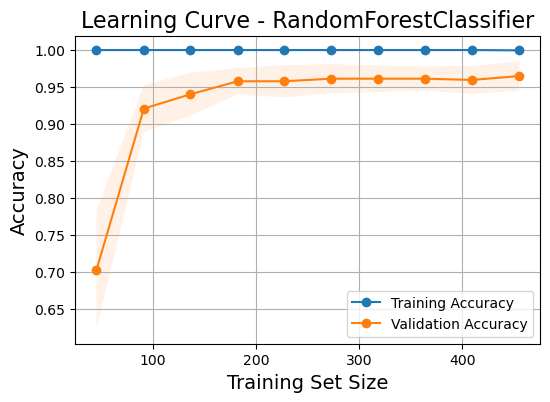

----------------------------------------------------------------------------------------------------


In [83]:
# Defining param grid
param_grid_rf = {
    'n_estimators': [10,40,80], # Number of trees in the forest
    'criterion': ['gini', 'entropy'], # Split criterion: Gini impurity or information gain (entropy)
    'max_depth': [3,5,10], # Maximum depth of the trees (None means unlimited depth)
    'min_samples_split': [2, 5], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2], # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'], # Number of features to consider when looking for the best split
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'ccp_alpha': [0.001, 0.005, 0.01, 0.05] # Complexity parameter used for Minimal Cost-Complexity Pruning
}

# Defining model
model_RF = RandomForestClassifier() 
model_RF.fit(X_train1, y_train1)
# Function to find best parameter
model_gridsearchCV(model_RF,param_grid_rf,X_new,y,X_train1,y_train1)

 - KNN Classifier Parameter tunning

The best parameter found on development set is :
{'n_neighbors': 9, 'p': 2}

The best estimator is KNeighborsClassifier(n_neighbors=9)
The best score is 96.7 %


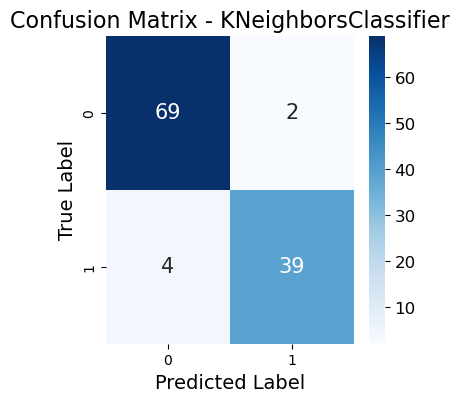

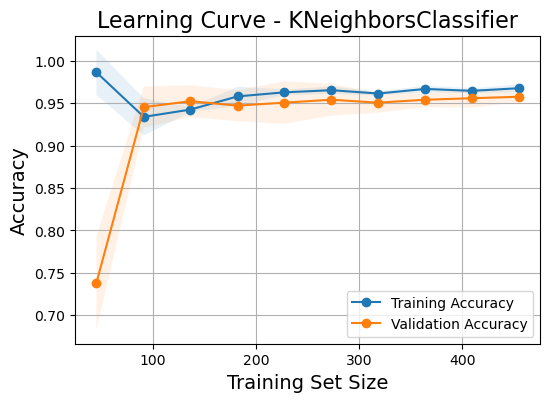

----------------------------------------------------------------------------------------------------


In [79]:
# Defining param grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9], # Number of neighbors to consider
    'p': [1, 2] # Power parameter for the Minkowski distance
}

# Defining model
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train1, y_train1)
# Function to find best parameter
model_gridsearchCV(model_KNN,param_grid_knn,X_new,y,X_train1,y_train1)

 - SVC Parameter Tunning

The best parameter found on development set is :
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

The best estimator is SVC(C=1, kernel='linear')
The best score is 98.01 %


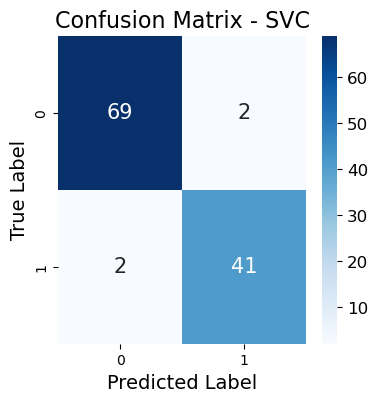

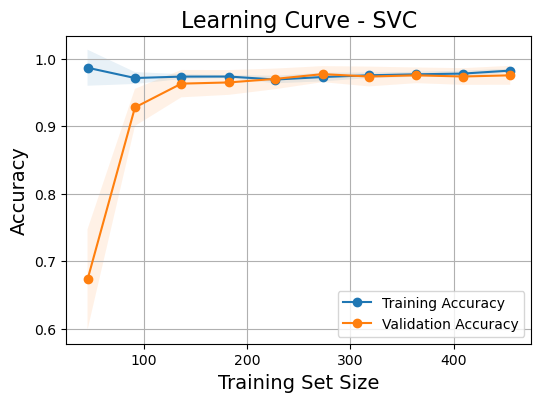

----------------------------------------------------------------------------------------------------


In [80]:
# Defining param grid
param_grid_svc = {
    'C': [0.1, 1, 10],                  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Kernel type: linear, radial basis function (RBF), polynomial
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf' and 'poly'
}
# Defining model
model_SVC1 = SVC()
model_SVC1.fit(X_train1, y_train1)
# Function to find best parameter
model_gridsearchCV(model_SVC1,param_grid_svc,X_new,y,X_train1,y_train1)

  - XGB Classifier Parameter Tunning

The best parameter found on development set is :
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50}

The best estimator is XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
The best score is 97.36 %


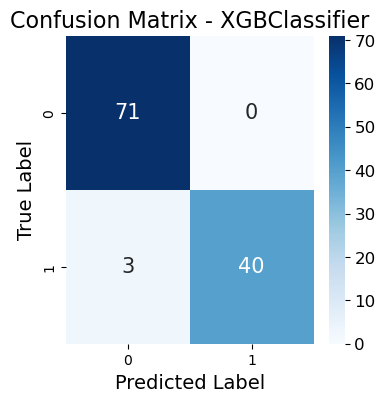

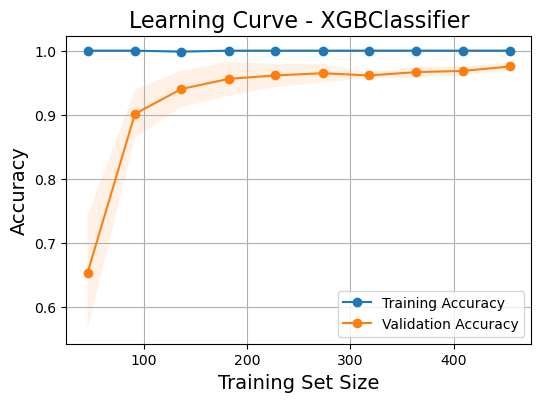

----------------------------------------------------------------------------------------------------


In [71]:
# Defining param grid
param_grid_xgb = {
    'n_estimators': [10,50,80],           # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage to prevent overfitting
    'max_depth': [3, 4, 5],                    # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],             # Minimum sum of instance weight (hessian) needed in a child
    'colsample_bytree': [0.8, 1.0],            # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                    # Minimum loss reduction required to make a further partition on a leaf node
}

# Defining model
model_XGB = XGBClassifier()
model_XGB.fit(X_train1, y_train1)
# Function to find best parameter
model_gridsearchCV(model_XGB,param_grid_xgb,X_new,y,X_train1,y_train1)

<a id="prediction-system"></a>
## <font color='blue'>Creating predicting system</font>

In [ ]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = ss.transform(in_data_re)

model_XGB = XGBClassifier()
model_XGB.fit(X_train1,y_train1)
#print the predicted output for input array
print("Breast Cancer Detected (Malignant)" if model_XGB.predict(in_data_sca) else "No Breast Cancer Detected (Benign)")

In [ ]:
1937.05,86.20,0.14710,0.049040,0.41915,17.33,0.62695,0.7119 - M

In [ ]:
711.20,23.56,0.04781,0.014600,0.29770,19.26,0.17730,0.2390 - B

<a id="conclusion"></a>
## <font color='blue'>Conclusion :</font>

**Findings :**
In this project, we analyzed the Breast Cancer Wisconsin (Diagnostic) dataset to understand factors affecting breast tumor diagnoses. Our statistical analysis provided insights into the differences between malignant and benign tumors, particularly in terms of their size. We found that malignant tumors generally have larger size values compared to benign tumors.

we have attempted to predict breast cancer using a numerical dataset by applying a list of algorithms. To improve the performance of our model, we first normalized the data, which helped to standardize the range of values and improve the accuracy of the model.

We then performed hyperparameter tuning to find the optimal values of parameter. By gradually improving the performance of our models through these techniques, we were able to achieve better accuracy in predicting breast cancer. Overall, our findings suggest that XGB can be a useful tool for predicting breast cancer, and these techniques can help to optimize its performance.

Good accuracy with only 8 features : 97.36 % (We make the right prediction in 97.36 % of the cases)
 
 
**Improvements :**
 - We can use the Deep Learning algorithms for more accuaracy
 - We can explore more based on age and their lifestyle.
 - Need to research on dealing with this kind of sensitive data set.

<a id="references"></a>
## <font color='blue'>References: </font>
https://data.world/uci/breast-cancer-wisconsin-diagnostic
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/grid_search.html
https://medium.com/grabngoinfo/hyperparameter-tuning-for-xgboost-91449869c57e
https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html
https://machinelearningmastery.com/calculate-feature-importance-with-python/